In [1]:
library(dplyr)
library(ggplot2)
library(ggpubr)
library(rstatix)
library(svglite)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [2]:
packageVersion('ggplot2'); packageVersion('ggpubr'); sessionInfo ()

[1] ‘3.3.3’

[1] ‘0.4.0’

R version 4.0.3 (2020-10-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /public/home/test1/soft/anaconda3/envs/R4.0/lib/libopenblasp-r0.3.12.so

locale:
 [1] LC_CTYPE=zh_CN.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=zh_CN.UTF-8        LC_COLLATE=zh_CN.UTF-8    
 [5] LC_MONETARY=zh_CN.UTF-8    LC_MESSAGES=zh_CN.UTF-8   
 [7] LC_PAPER=zh_CN.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=zh_CN.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] svglite_2.0.0 rstatix_0.7.0 ggpubr_0.4.0  ggplot2_3.3.3 dplyr_1.0.6  

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-5      tidyselect_1.1.1  repr_1.1.3        purrr_0.3.4      
 [5] haven_2.4.1       carData_3.0-4     colorspace_2.0-1  vctrs_0.3.8      
 [9] generics_0.1.0  

### What are the various gene characteristics related to prediction accuracy?

In [86]:
reload_data<- function(){
    print('reloading again')
    filename = '/media/eys/xwj/proteome/data/toR_violin20220108.txt'
    data = read.table(filename, sep='\t',  header = 1, row.names = NULL )
    data$dataset <- factor(data$dataset, levels = unique(data$dataset), ordered = TRUE)
    return(data)
}
rm(data)
data = reload_data()
data

[1] "reloading again"


X,dataset,level_1,r,abundance,r_group,tissue_specificity,protein_ptm,complex,subcell,class,omim,essential,halflife,peptide_length,abundance_labelfree
<int>,<ord>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0,CO_labelfree,ENSG00000000419,0.095472649,2.6990,r1,not_tissue_elevated,ACETYLATION,in_complex,,other enzyme,omim_gene,essential,long_life,short_peptide,low_abundance
1,CO_labelfree,ENSG00000000457,0.251826284,2.5360,r2,not_tissue_elevated,MYRISTOYLATION,not_in_complex,,,not_omim_gene,not_essential,,,low_abundance
2,CO_labelfree,ENSG00000000938,-0.150681616,2.7700,r0,not_tissue_elevated,PHOSPHORYLATION,not_in_complex,,,not_omim_gene,not_essential,,,low_abundance
3,CO_labelfree,ENSG00000000971,0.432967272,5.2365,r4,not_tissue_elevated,GLYCOSYLATION,not_in_complex,Secretory,not enzyme,omim_gene,not_essential,long_life,long_peptide,high_abundance
4,CO_labelfree,ENSG00000001084,0.356722818,2.1435,r3,not_tissue_elevated,ACETYLATION,in_complex,Nucleus,other enzyme,omim_gene,not_essential,long_life,long_peptide,low_abundance
5,CO_labelfree,ENSG00000002549,0.340255128,4.3420,r3,not_tissue_elevated,S-NITROSYLATION,not_in_complex,Nucleus,peptidase,not_omim_gene,not_essential,long_life,long_peptide,medium_abundance
6,CO_labelfree,ENSG00000002834,0.143867528,4.7350,r1,tissue_elevated,METHYLATION,not_in_complex,Secretory,not enzyme,not_omim_gene,not_essential,long_life,short_peptide,high_abundance
7,CO_labelfree,ENSG00000004059,0.291381340,4.2535,r2,not_tissue_elevated,MYRISTOYLATION,not_in_complex,,not enzyme,not_omim_gene,not_essential,short_life,short_peptide,medium_abundance
8,CO_labelfree,ENSG00000004455,0.185704488,5.0040,r1,not_tissue_elevated,S-NITROSYLATION,not_in_complex,,other enzyme,omim_gene,not_essential,short_life,short_peptide,high_abundance


### gene are essential or not

Warning message:
“Ignoring unknown parameters: draw_quantiles”
Warning message:
“Ignoring unknown parameters: draw_quantiles”


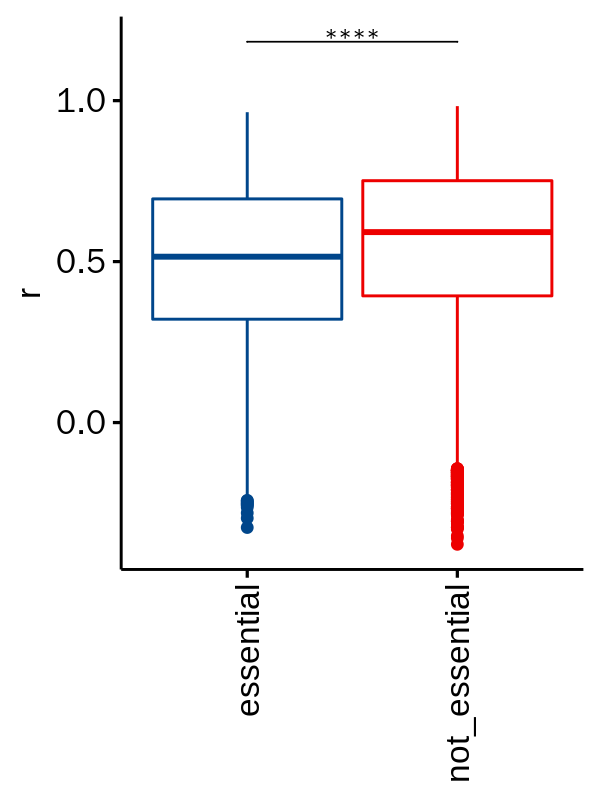

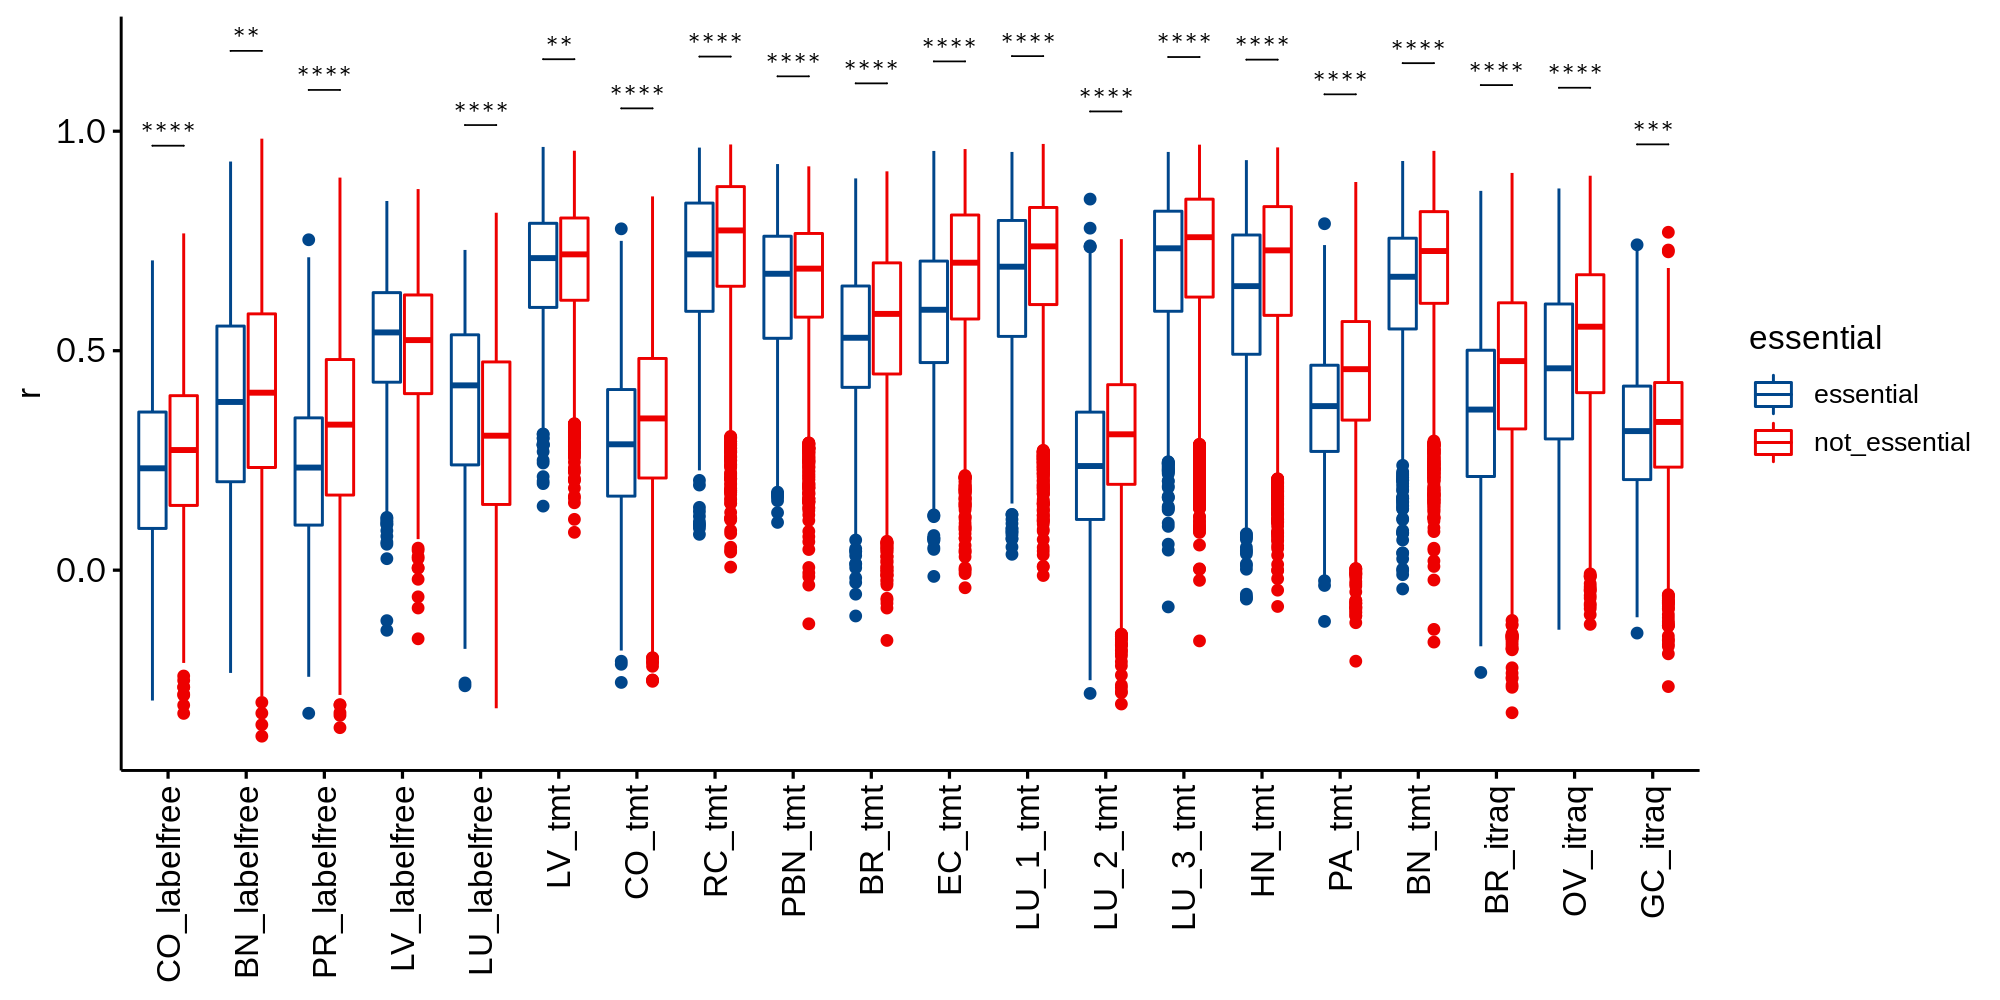

In [87]:
data$essential <- factor(data$essential, levels = unique(data$essential), ordered = TRUE)

#########
stat.test <- data %>% 
    wilcox_test(r ~ essential) %>%
    adjust_pvalue(method = "BH") %>%
    add_significance("p.adj") %>% filter(p.adj.signif != "ns") %>%
    add_xy_position(x = "essential", step.increase = 0) # dodge = 0.5, 

options(repr.plot.width = 3,  repr.plot.height = 4,  repr.plot.res = 200)
ggboxplot( data, x = "essential", y = "r", color = "essential", palette = "lancet", draw_quantiles = 0.5, # yscale = "log2",ylab ='log2(expression)',
        width = 0.9, title = NULL, ) +
    stat_pvalue_manual( stat.test, label = "p.adj.signif", tip.length =0, hide.ns = F, size =3, bracket.nudge.y = 0.2, 
                       step.increase = 0.05, vjust=0.5) +
    theme( axis.title.x=element_blank(), axis.text.x = element_text(angle=90, vjust=0.5, hjust=1), legend.position='none') 
ggsave("/media//eys/xwj/proteome/data/figs/fig8_essential.svg", width = 3, height=7, units = 'cm')
######### 
stat.test <- data %>% 
    group_by(dataset) %>%
    wilcox_test(r ~ essential) %>%
    adjust_pvalue(method = "BH") %>%
    add_significance("p.adj") %>% filter(p.adj.signif != "ns") %>%
    add_xy_position(x = "dataset", step.increase = 0) # dodge = 0.5, 

options(repr.plot.width = 10,  repr.plot.height = 5,  repr.plot.res = 200)
ggboxplot( data, x = "dataset", y = "r", color = "essential", palette = "lancet", draw_quantiles = 0.5, # yscale = "log2",ylab ='log2(expression)',
        width = 0.7, title = NULL, ) +
    stat_pvalue_manual( stat.test, label = "p.adj.signif", tip.length =0, hide.ns = F, size =3, bracket.nudge.y = 0.2, 
                       step.increase = 0, vjust=0, step.group.by='dataset') +
    theme( axis.title.x=element_blank(), axis.text.x = element_text(angle=90, vjust=0.5, hjust=1), legend.position="right") 

ggsave("/media//eys/xwj/proteome/data/figs/fig8_essential2.svg", width = 20, height=12, units = 'cm')

### gene in specific tissue  elevated

Warning message:
“Ignoring unknown parameters: draw_quantiles”
Warning message:
“Ignoring unknown parameters: draw_quantiles”


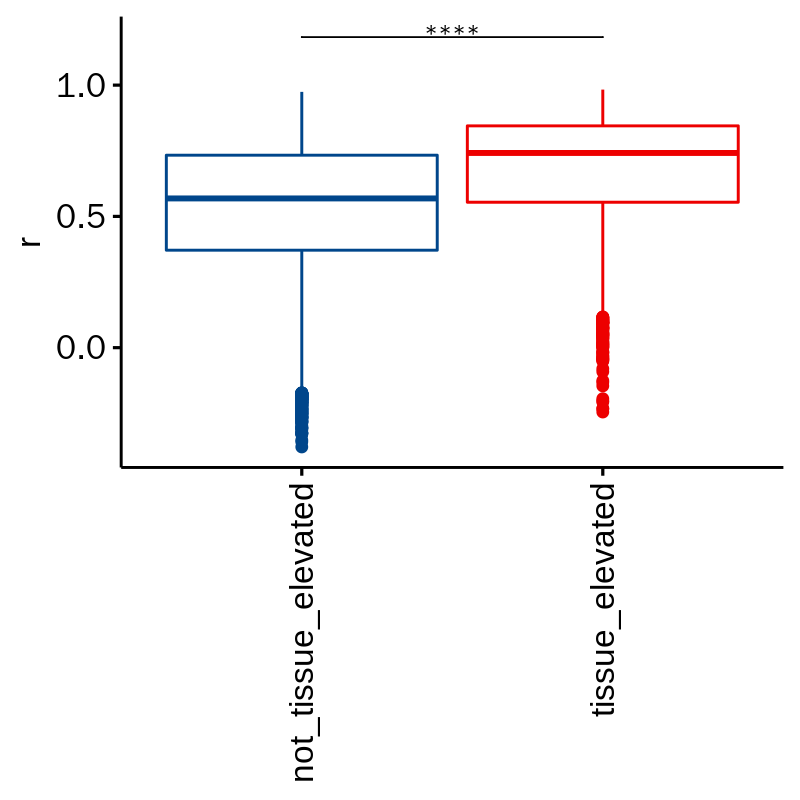

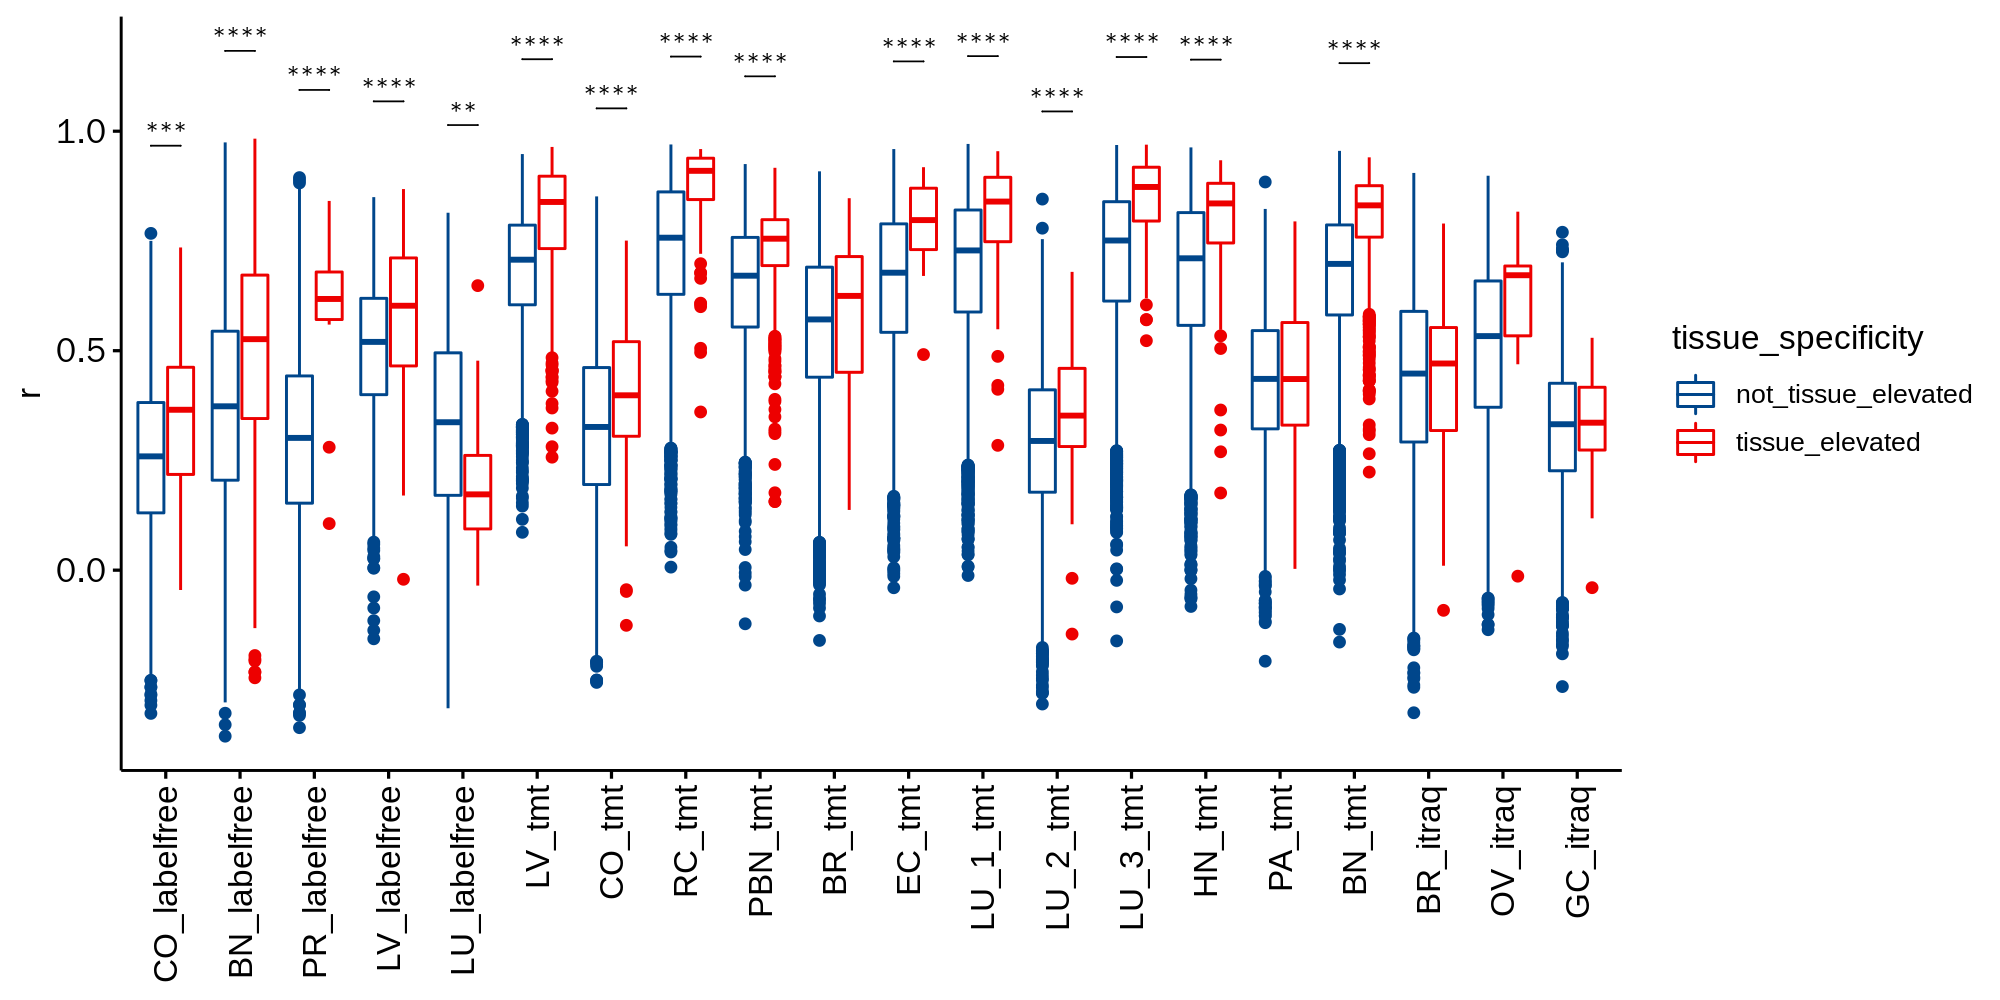

In [88]:
data$tissue_specificity <- factor(data$tissue_specificity, levels = unique(data$tissue_specificity), ordered = TRUE)

#########
stat.test <- data %>% 
    wilcox_test(r ~ tissue_specificity) %>%
    adjust_pvalue(method = "BH") %>%
    add_significance("p.adj") %>% filter(p.adj.signif != "ns") %>%
    add_xy_position(x = "tissue_specificity", step.increase = 0) # dodge = 0.5, 

options(repr.plot.width = 4,  repr.plot.height = 4,  repr.plot.res = 200)
ggboxplot( data, x = "tissue_specificity", y = "r", color = "tissue_specificity", palette = "lancet", draw_quantiles = 0.5, # yscale = "log2",ylab ='log2(expression)',
        width = 0.9, title = NULL, ) +
    stat_pvalue_manual( stat.test, label = "p.adj.signif", tip.length =0, hide.ns = F, size =3, bracket.nudge.y = 0.2, 
                       step.increase = 0.05, vjust=0.5) +
    theme( axis.title.x=element_blank(), axis.text.x = element_text(angle=90, vjust=0.5, hjust=1), legend.position='none') 
ggsave("/media//eys/xwj/proteome/data/figs/fig8_tissue_specificity.svg", width = 3, height=7, units = 'cm')
######### 
stat.test <- data %>% 
    group_by(dataset) %>%
    wilcox_test(r ~ tissue_specificity) %>%
    adjust_pvalue(method = "BH") %>%
    add_significance("p.adj") %>% filter(p.adj.signif != "ns") %>%
    add_xy_position(x = "dataset", step.increase = 0) # dodge = 0.5, 

options(repr.plot.width = 10,  repr.plot.height = 5,  repr.plot.res = 200)
ggboxplot( data, x = "dataset", y = "r", color = "tissue_specificity", palette = "lancet", draw_quantiles = 0.5, # yscale = "log2",ylab ='log2(expression)',
        width = 0.7, title = NULL, ) +
    stat_pvalue_manual( stat.test, label = "p.adj.signif", tip.length =0, hide.ns = F, size =3, bracket.nudge.y = 0.2, 
                       step.increase = 0, vjust=0, step.group.by='dataset') +
    theme( axis.title.x=element_blank(), axis.text.x = element_text(angle=90, vjust=0.5, hjust=1), legend.position="right") 

ggsave("/media//eys/xwj/proteome/data/figs/fig8_tissue_specificity2.svg", width = 20, height=12 ,units = 'cm')

### gene in omim database

Warning message:
“Ignoring unknown parameters: draw_quantiles”
Warning message:
“Ignoring unknown parameters: draw_quantiles”


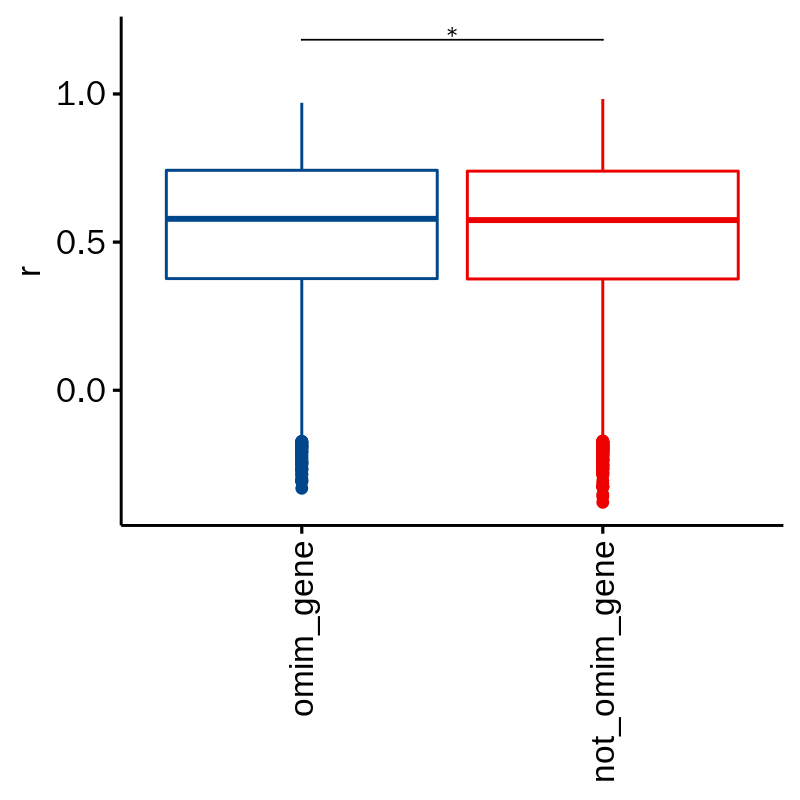

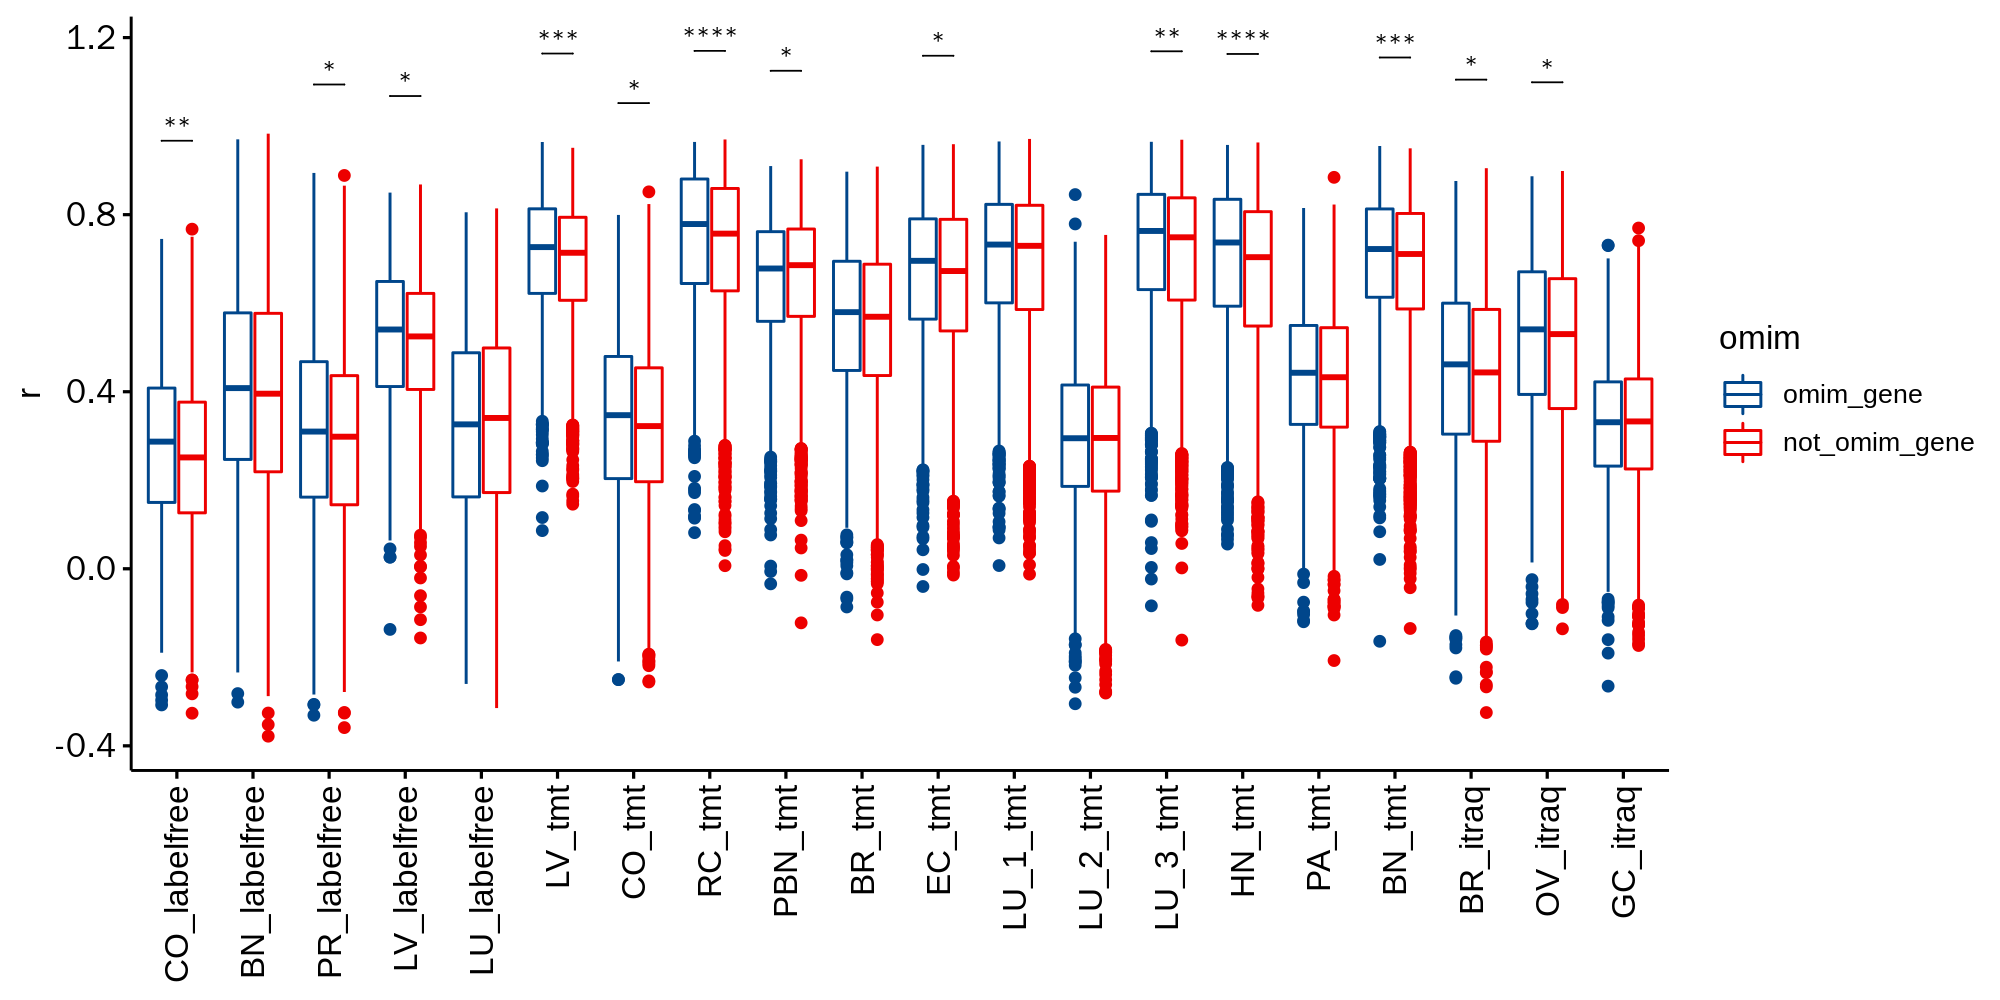

In [89]:
data$omim <- factor(data$omim, levels = unique(data$omim), ordered = TRUE)

#########
stat.test <- data %>% 
    wilcox_test(r ~ omim) %>%
    adjust_pvalue(method = "BH") %>%
    add_significance("p.adj") %>% filter(p.adj.signif != "ns") %>%
    add_xy_position(x = "omim", step.increase = 0) # dodge = 0.5, 

options(repr.plot.width = 4,  repr.plot.height = 4,  repr.plot.res = 200)
ggboxplot( data, x = "omim", y = "r", color = "omim", palette = "lancet", draw_quantiles = 0.5, # yscale = "log2",ylab ='log2(expression)',
        width = 0.9, title = NULL, ) +
    stat_pvalue_manual( stat.test, label = "p.adj.signif", tip.length =0, hide.ns = F, size =3, bracket.nudge.y = 0.2, 
                       step.increase = 0.05, vjust=0.5) +
    theme( axis.title.x=element_blank(), axis.text.x = element_text(angle=90, vjust=0.5, hjust=1), legend.position="none") 
ggsave("/media//eys/xwj/proteome/data/figs/fig8_omim.svg", width = 3, height=7, units = 'cm')
######### 
stat.test <- data %>% 
    group_by(dataset) %>%
    wilcox_test(r ~ omim) %>%
    adjust_pvalue(method = "BH") %>%
    add_significance("p.adj") %>% filter(p.adj.signif != "ns") %>%
    add_xy_position(x = "dataset", step.increase = 0) # dodge = 0.5, 

options(repr.plot.width = 10,  repr.plot.height = 5,  repr.plot.res = 200)
ggboxplot( data, x = "dataset", y = "r", color = "omim", palette = "lancet", draw_quantiles = 0.5, # yscale = "log2",ylab ='log2(expression)',
        width = 0.7, title = NULL, ) +
    stat_pvalue_manual( stat.test, label = "p.adj.signif", tip.length =0, hide.ns = F, size =3, bracket.nudge.y = 0.2, 
                       step.increase = 0.05, vjust=0, step.group.by='dataset') +
    theme( axis.title.x=element_blank(), axis.text.x = element_text(angle=90, vjust=0.5, hjust=1), legend.position="right") 
ggsave("/media//eys/xwj/proteome/data/figs/fig8_omim2.svg", width = 20, height=12, units = 'cm')

### protein_post-translational modification

[1] "reloading again"


Warning message:
“Ignoring unknown parameters: draw_quantiles”


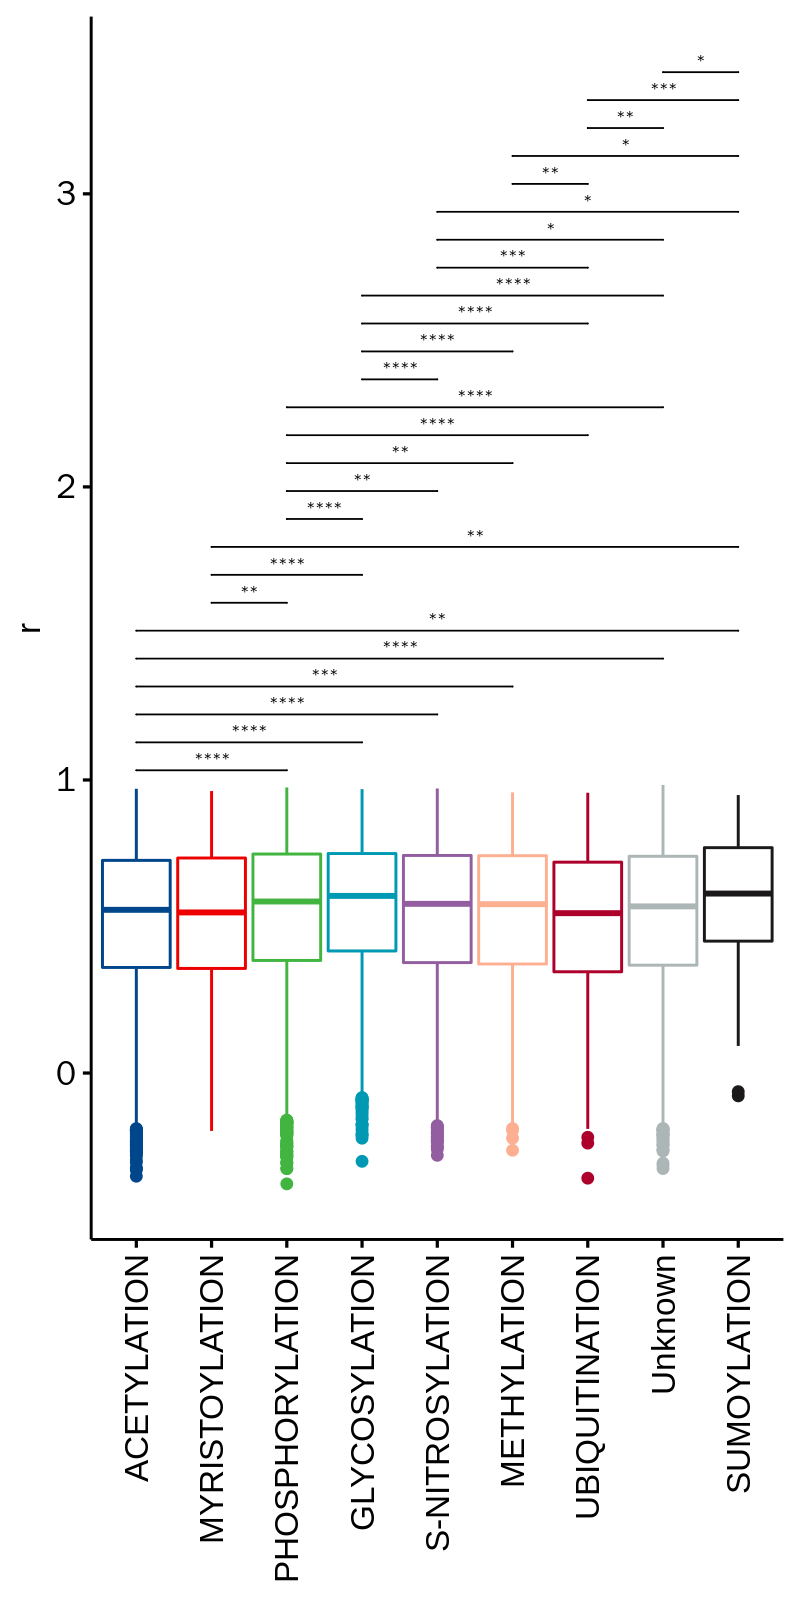

In [109]:
data <- reload_data()
data$protein_ptm <- factor(data$protein_ptm, levels = unique(data$protein_ptm), ordered = TRUE)

#########
stat.test <- data %>% 
    wilcox_test(r ~ protein_ptm) %>%
    adjust_pvalue(method = "BH") %>%
    add_significance("p.adj") %>% filter(p.adj.signif != "ns") %>%
    add_xy_position(x = "protein_ptm", step.increase = 0) # dodge = 0.5, 

options(repr.plot.width = 4,  repr.plot.height = 8,  repr.plot.res = 200)
ggboxplot( data, x = "protein_ptm", y = "r", color = "protein_ptm", palette = "lancet", draw_quantiles = 0.5, # yscale = "log2",ylab ='log2(expression)',
        width = 0.9, title = NULL, ) +
    stat_pvalue_manual( stat.test, label = "p.adj.signif", tip.length =0, hide.ns = F, size =2, bracket.nudge.y = 0.05, 
                       step.increase = 0.07, vjust=0.5) +
    theme( axis.title.x=element_blank(), axis.text.x = element_text(angle=90, vjust=0.5, hjust=1), legend.position="none") 
ggsave("/media//eys/xwj/proteome/data/figs/fig8_ptm.svg", width = 6, height=12, units = 'cm')

######### 
stat.test <- data %>% 
    group_by(dataset) %>%
    wilcox_test(r ~ protein_ptm) %>%
    adjust_pvalue(method = "BH") %>%
    add_significance("p.adj") %>% filter(p.adj.signif != "ns") %>%
    add_xy_position(x = "dataset", step.increase = 0) # dodge = 0.5, 

options(repr.plot.width = 20,  repr.plot.height = 8,  repr.plot.res = 200)
ggboxplot( data, x = "dataset", y = "r", color = "protein_ptm", palette = "lancet", draw_quantiles = 0.5, # yscale = "log2",ylab ='log2(expression)',
        width = 0.7, title = NULL, ) +
    stat_pvalue_manual( stat.test, label = "p.adj.signif", tip.length =0, hide.ns = F, size =3, bracket.nudge.y = 0.2, 
                       step.increase = 0.05, vjust=0.5, step.group.by='dataset') +
    theme( axis.title.x=element_blank(), axis.text.x = element_text(angle=90, vjust=0.5, hjust=1), legend.position="right") 
ggsave("/media//eys/xwj/proteome/data/figs/fig8_ptm2.svg", width = 30, height=12, units = 'cm')

### protein in a large complex with many subunit

[1] "reloading again"


Warning message:
“Ignoring unknown parameters: draw_quantiles”
Warning message:
“Ignoring unknown parameters: draw_quantiles”


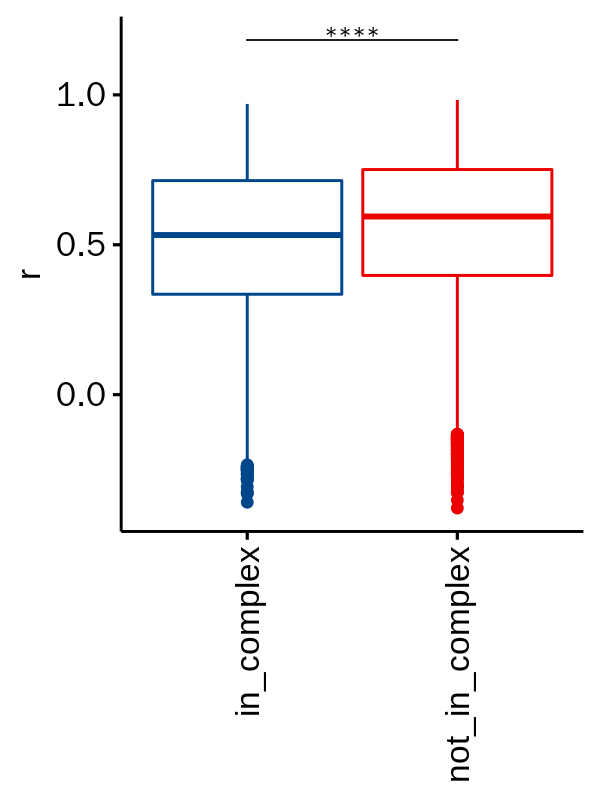

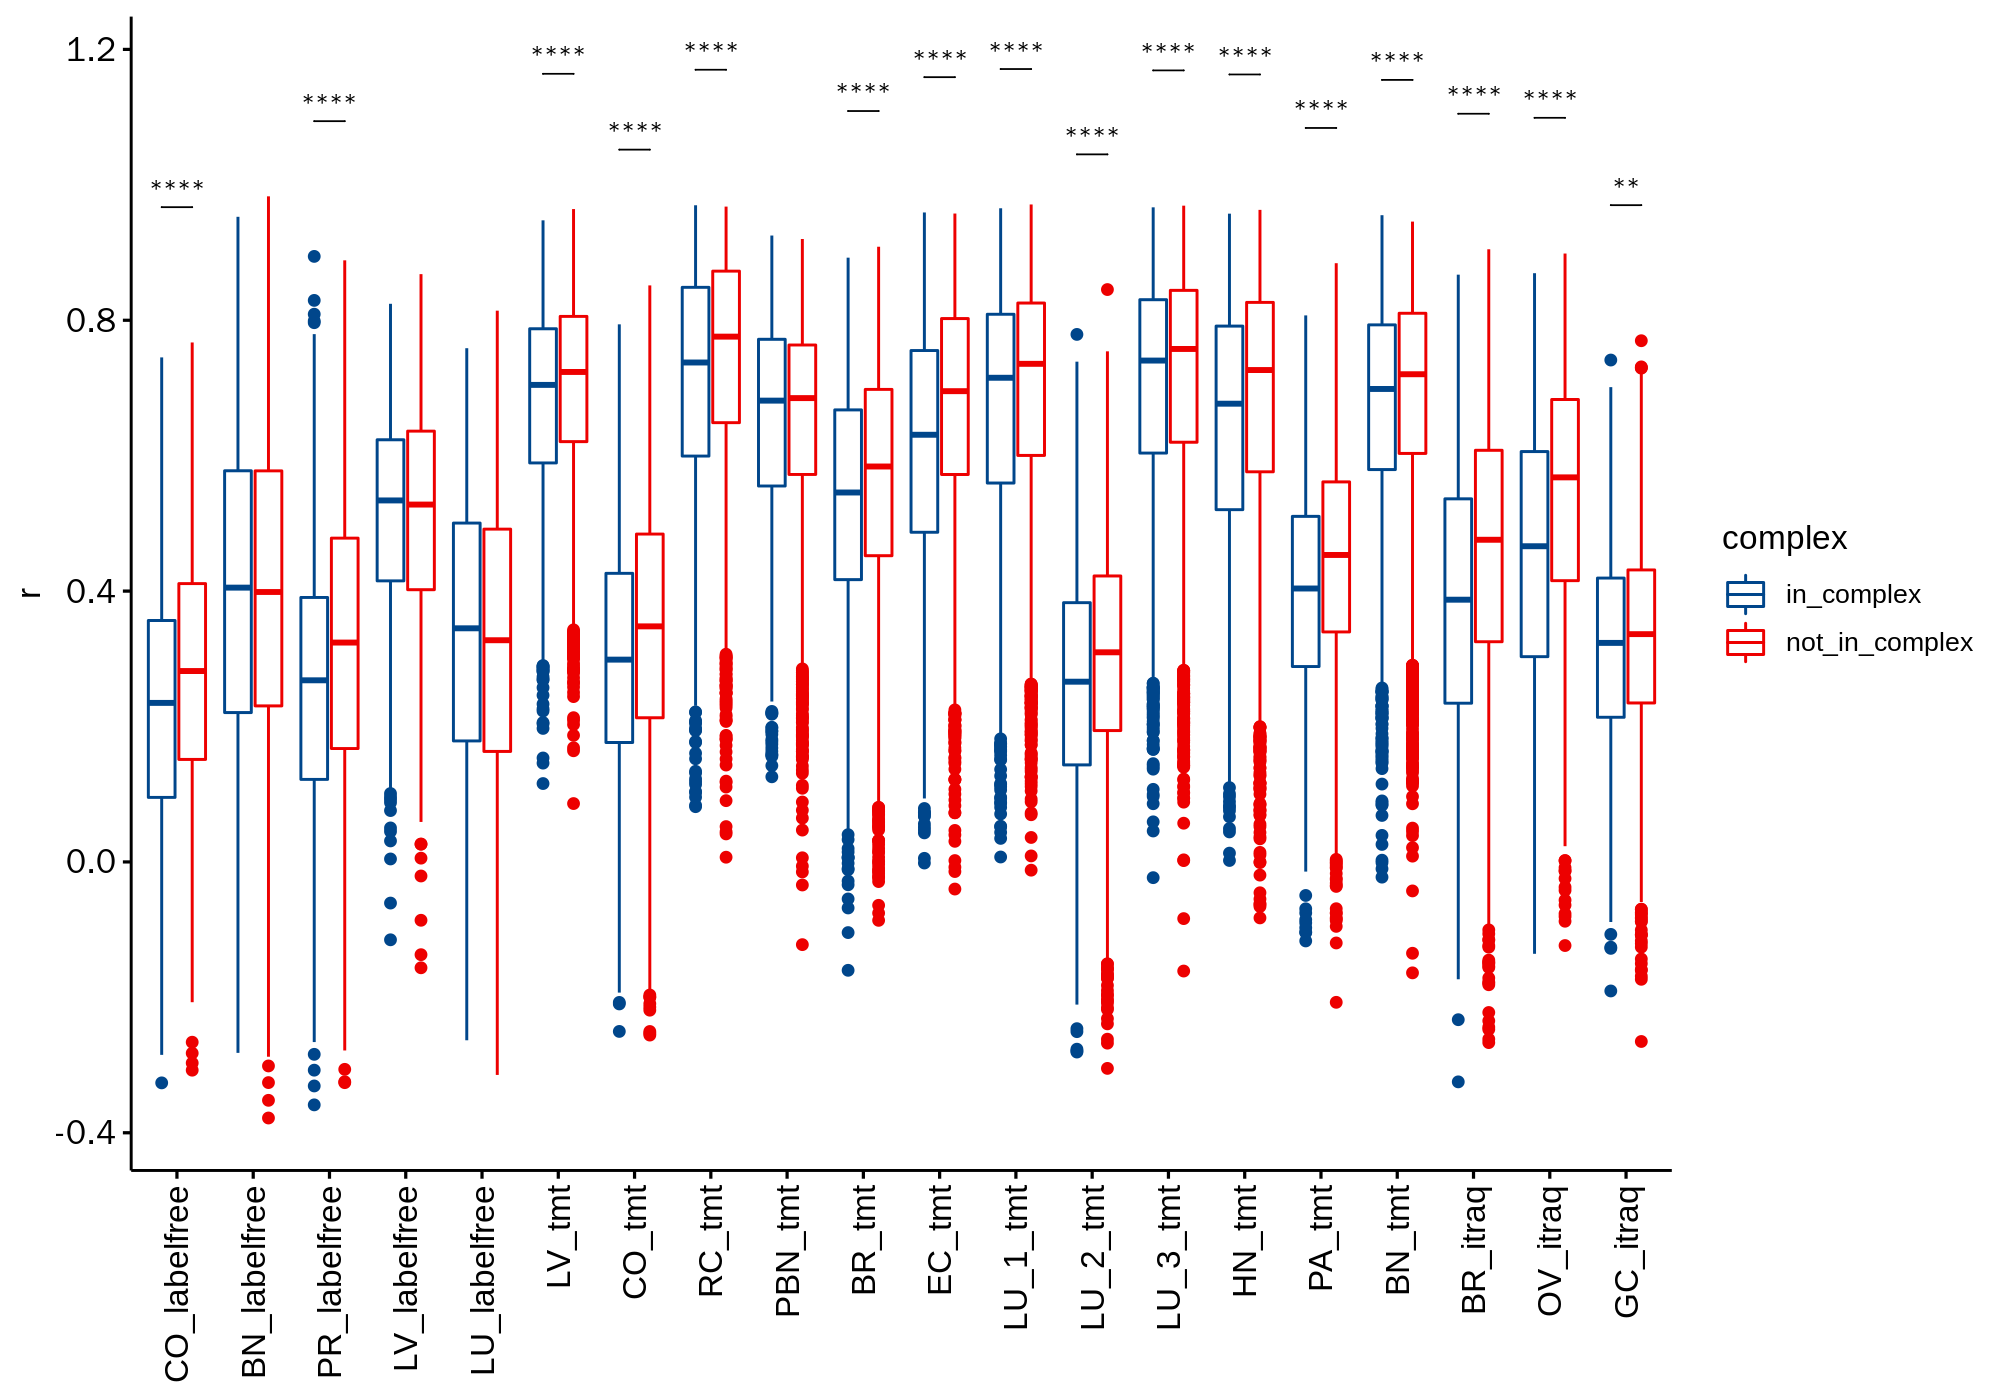

In [105]:
data <- reload_data()
data$complex <- factor(data$complex, levels = unique(data$complex), ordered = TRUE)

#######
stat.test <- data %>% 
    wilcox_test(r ~ complex) %>%
    adjust_pvalue(method = "BH") %>%
    add_significance("p.adj") %>% filter(p.adj.signif != "ns") %>%
    add_xy_position(x = "complex", step.increase = 0) # dodge = 0.5, 

options(repr.plot.width = 3,  repr.plot.height = 4,  repr.plot.res = 200)
ggboxplot( data, x = "complex", y = "r", color = "complex", palette = "lancet", draw_quantiles = 0.5, # yscale = "log2",ylab ='log2(expression)',
        width = 0.9, title = NULL, ) +
    stat_pvalue_manual( stat.test, label = "p.adj.signif", tip.length =0, hide.ns = F, size =3, bracket.nudge.y = 0.2, 
                       step.increase = 0.05, vjust=0.5) +
    theme( axis.title.x=element_blank(), axis.text.x = element_text(angle=90, vjust=0.5, hjust=1), legend.position="none") 
ggsave("/media//eys/xwj/proteome/data/figs/fig8_complex.svg", width = 3, height=7, units = 'cm')
######### 
stat.test <- data %>% 
    group_by(dataset) %>%
    wilcox_test(r ~ complex) %>%
    adjust_pvalue(method = "BH") %>%
    add_significance("p.adj") %>% filter(p.adj.signif != "ns") %>%
    add_xy_position(x = "dataset", step.increase = 0) # dodge = 0.5, 

options(repr.plot.width = 10,  repr.plot.height = 7,  repr.plot.res = 200)
ggboxplot( data, x = "dataset", y = "r", color = "complex", palette = "lancet", draw_quantiles = 0.5, # yscale = "log2",ylab ='log2(expression)',
        width = 0.7, title = NULL, ) +
    stat_pvalue_manual( stat.test, label = "p.adj.signif", tip.length =0, hide.ns = F, size =3, bracket.nudge.y = 0.2, 
                       step.increase = 0, vjust=0, step.group.by='dataset') +
    theme( axis.title.x=element_blank(), axis.text.x = element_text(angle=90, vjust=0.5, hjust=1), legend.position="right") 
ggsave("/media//eys/xwj/proteome/data/figs/fig8_complex2.svg", width = 20, height=12, units = 'cm')

### protein subcellular

In [94]:
data = reload_data()
data <- data[data$subcell != '', ]  ## null
data$subcell <- factor(data$subcell, levels = unique(data$subcell), ordered = TRUE)

[1] "reloading again"


Warning message:
“Ignoring unknown parameters: draw_quantiles”
Warning message:
“Ignoring unknown parameters: draw_quantiles”


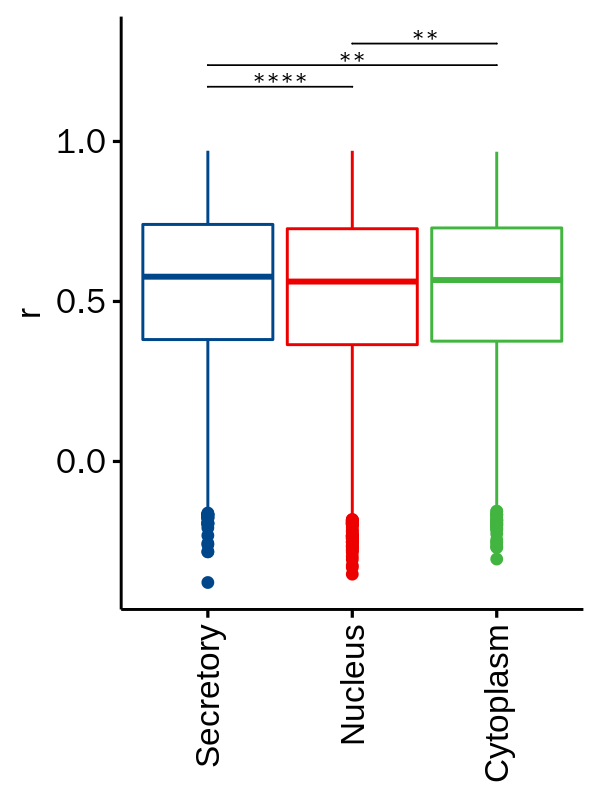

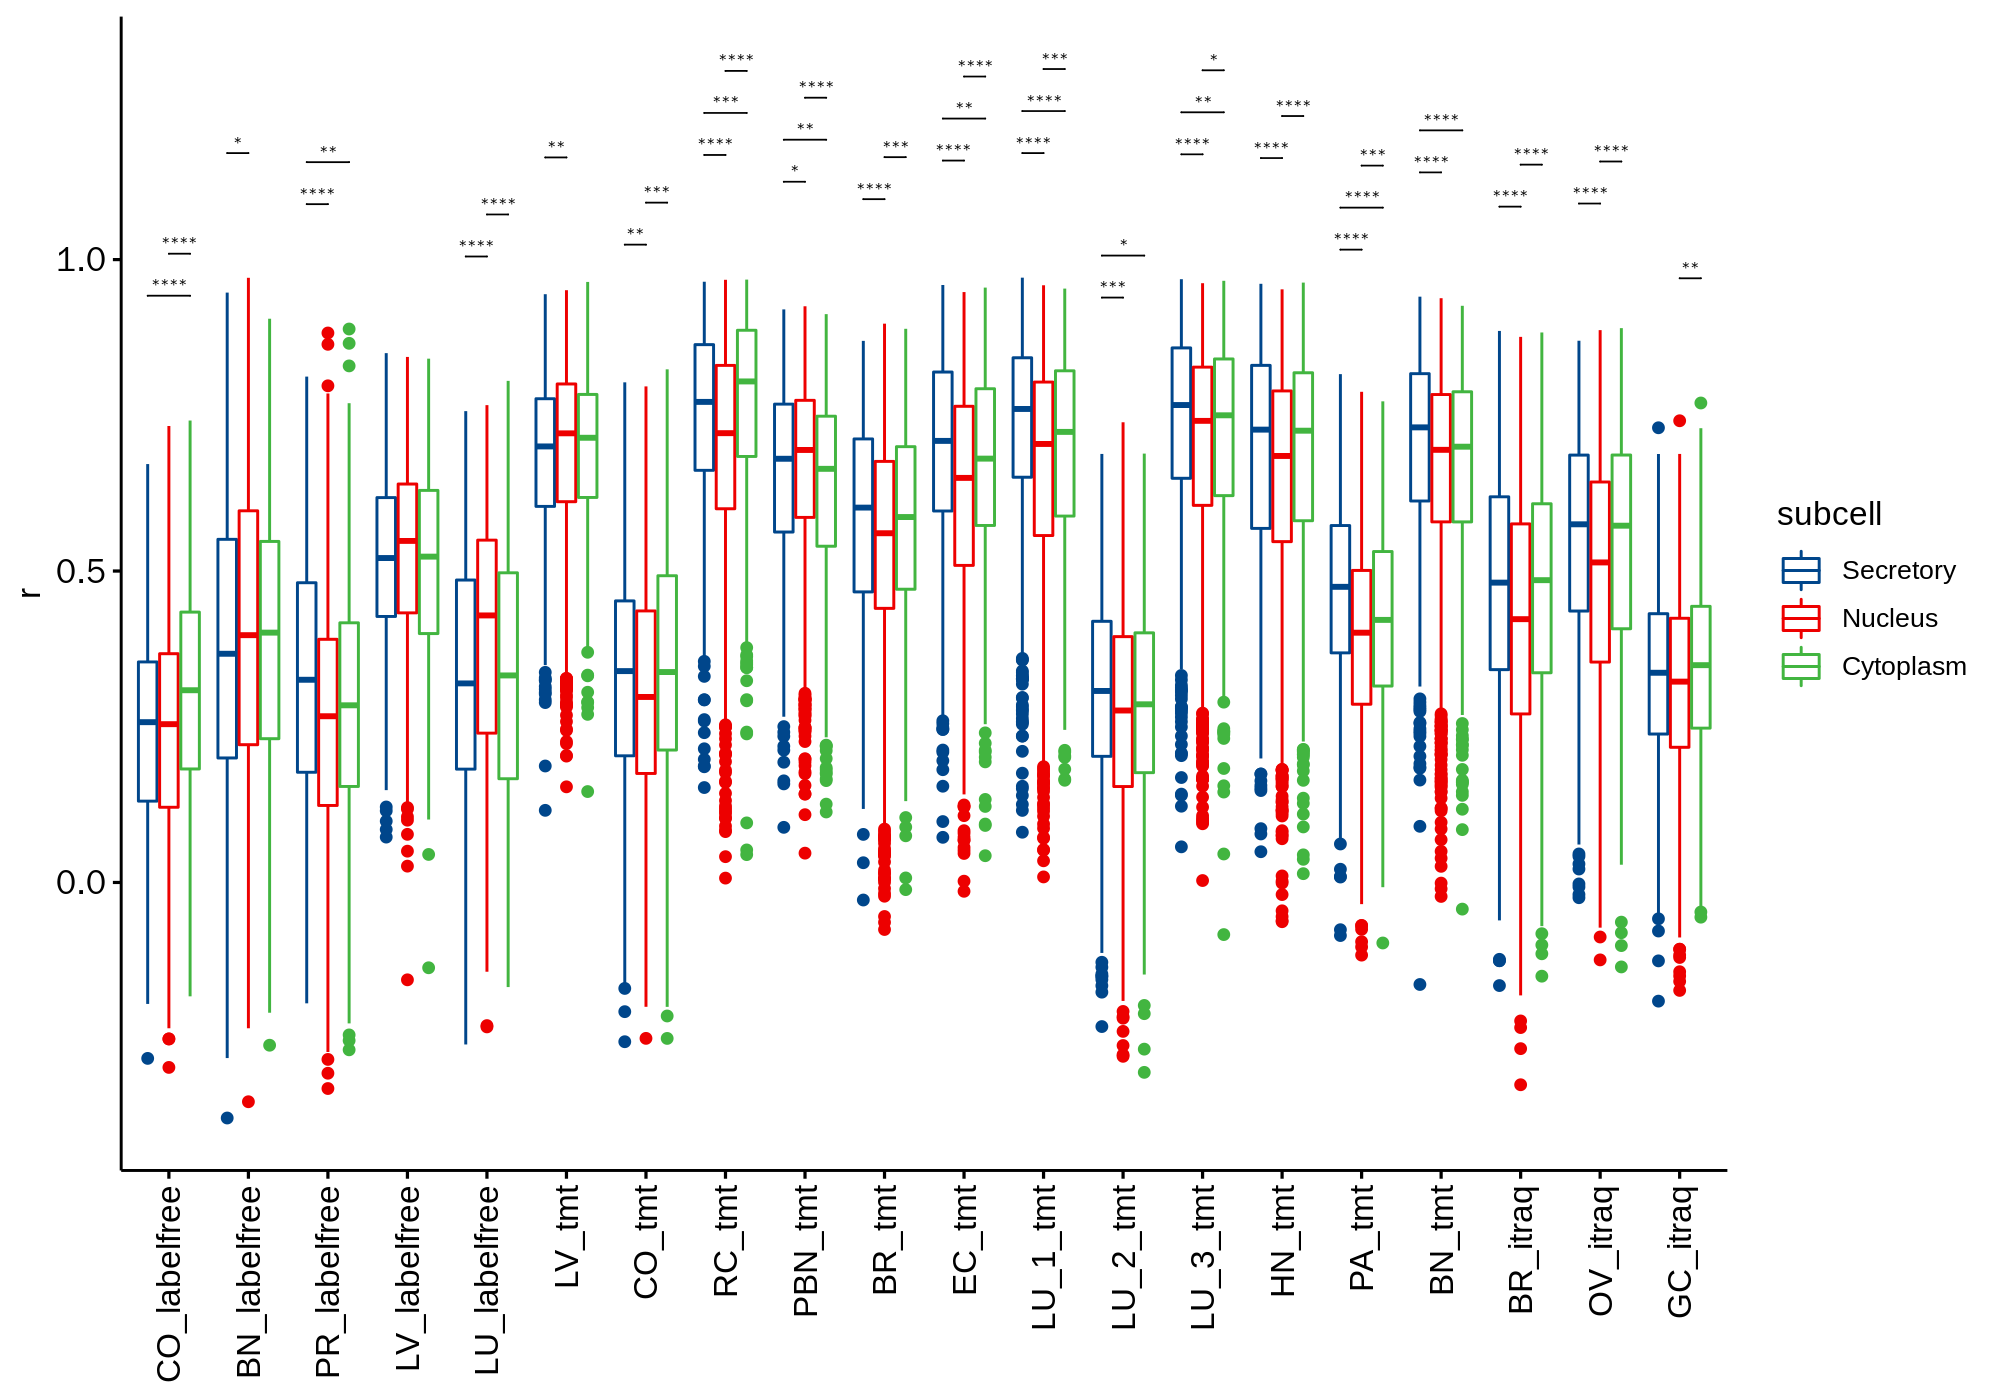

In [95]:
####
stat.test <- data %>% 
    wilcox_test(r ~ subcell) %>%
    adjust_pvalue(method = "BH") %>%
    add_significance("p.adj") %>% filter(p.adj.signif != "ns") %>%
    add_xy_position(x = "subcell", step.increase = 0) # dodge = 0.5, 

options(repr.plot.width = 3,  repr.plot.height = 4,  repr.plot.res = 200)
ggboxplot( data, x = "subcell", y = "r", color = "subcell", palette = "lancet", draw_quantiles = 0.5, # yscale = "log2",ylab ='log2(expression)',
        width = 0.9, title = NULL, ) +
    stat_pvalue_manual( stat.test, label = "p.adj.signif", tip.length =0, hide.ns = F, size =3, bracket.nudge.y = 0.2, 
                       step.increase = 0.05, vjust=0.5) +
    theme( axis.title.x=element_blank(), axis.text.x = element_text(angle=90, vjust=0.5, hjust=1), legend.position="none") 
ggsave("/media//eys/xwj/proteome/data/figs/fig8_subcell.svg", width = 3, height=7, units = 'cm')
######## 
stat.test <- data %>% 
    group_by(dataset) %>%
    wilcox_test(r ~ subcell) %>%
    adjust_pvalue(method = "BH") %>%
    add_significance("p.adj") %>% filter(p.adj.signif != "ns") %>%
    add_xy_position(x = "dataset", step.increase = 0) # dodge = 0.5, 

options(repr.plot.width = 10,  repr.plot.height = 7,  repr.plot.res = 200)
ggboxplot( data, x = "dataset", y = "r", color = "subcell", palette = "lancet", draw_quantiles = 0.5, # yscale = "log2",ylab ='log2(expression)',
        width = 0.7, title = NULL, ) +
    stat_pvalue_manual( stat.test, label = "p.adj.signif", tip.length =0, hide.ns = F, size =2, bracket.nudge.y = 0.2, 
                       step.increase = 0.05, vjust=0.5, step.group.by='dataset') +
    theme( axis.title.x=element_blank(), axis.text.x = element_text(angle=90, vjust=0.5, hjust=1), legend.position="right") 
ggsave("/media//eys/xwj/proteome/data/figs/fig8_subcell2.svg", width = 20, height=12, units = 'cm')

### protein function class

In [110]:
data = reload_data()
data <- data[data$class != '', ]  ## 
data$class <- factor(data$class, levels = unique(data$class), ordered = TRUE)

[1] "reloading again"


Warning message:
“Ignoring unknown parameters: draw_quantiles”
Warning message:
“Ignoring unknown parameters: draw_quantiles”


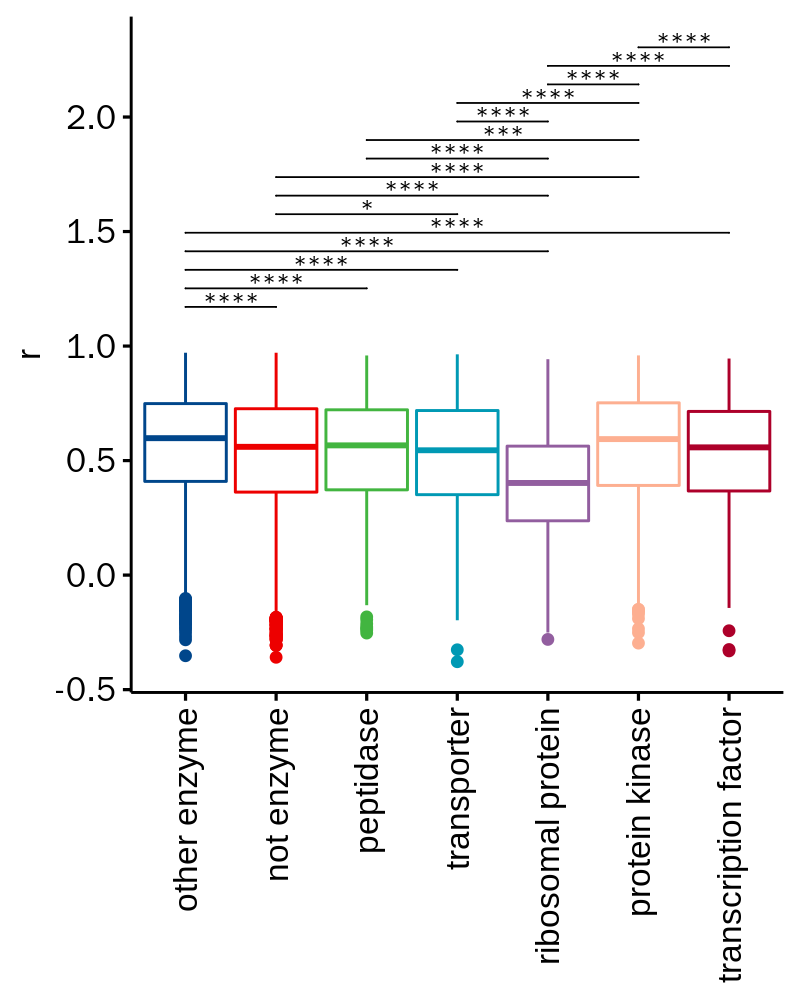

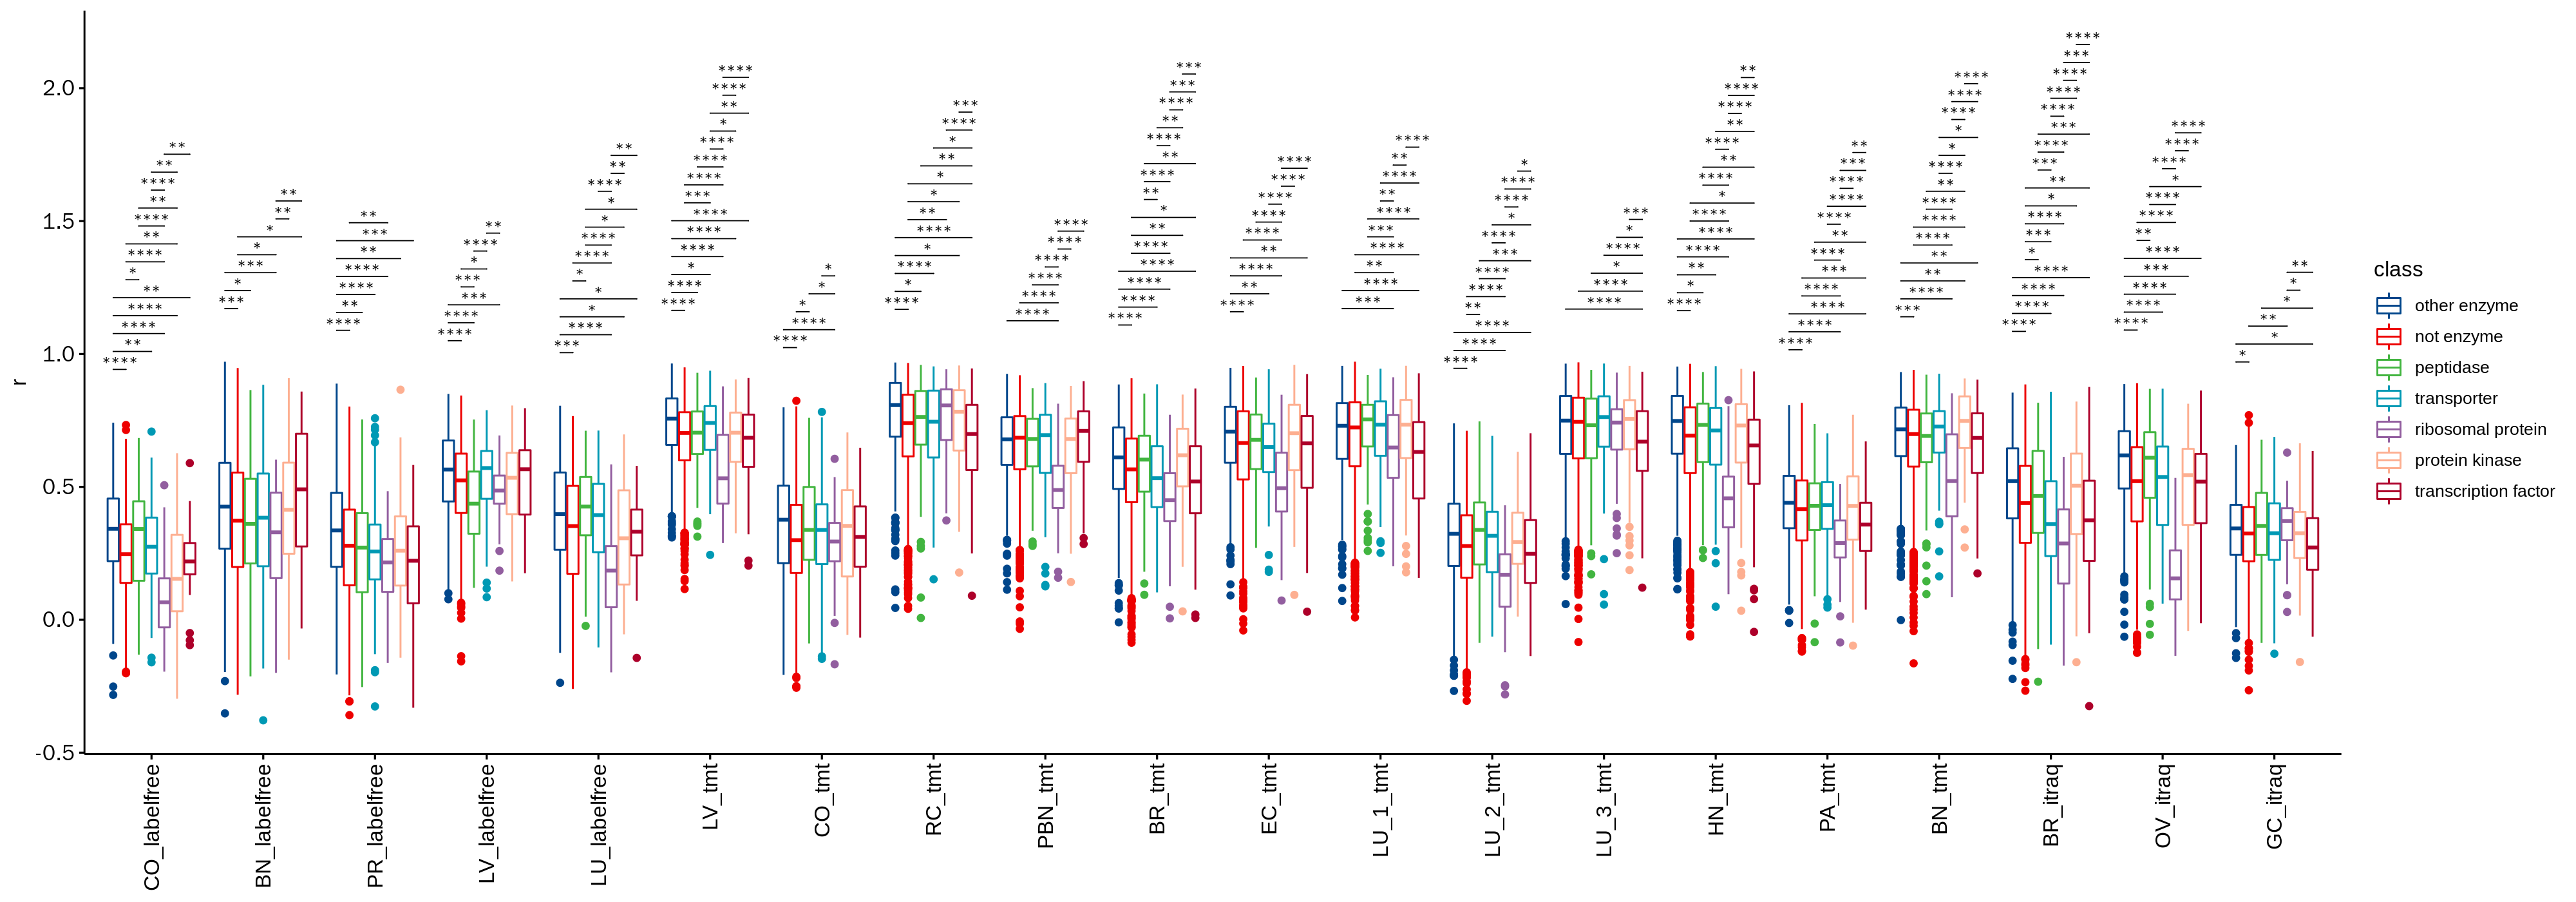

In [111]:
####
stat.test <- data %>% 
    wilcox_test(r ~ class) %>%
    adjust_pvalue(method = "BH") %>%
    add_significance("p.adj") %>% filter(p.adj.signif != "ns") %>%
    add_xy_position(x = "class", step.increase = 0) # dodge = 0.5, 

options(repr.plot.width =4,  repr.plot.height = 5,  repr.plot.res = 200)
ggboxplot( data, x = "class", y = "r", color = "class", palette = "lancet", draw_quantiles = 0.5, # yscale = "log2",ylab ='log2(expression)',
        width = 0.9, title = NULL, ) +
    stat_pvalue_manual( stat.test, label = "p.adj.signif", tip.length =0, hide.ns = F, size =3, bracket.nudge.y = 0.2, 
                       step.increase = 0.06, vjust=0.5) +
    theme( axis.title.x=element_blank(), axis.text.x = element_text(angle=90, vjust=0.5, hjust=1), legend.position="none") 
ggsave("/media//eys/xwj/proteome/data/figs/fig8_funclass.svg", width = 6, height=12, units = 'cm')
######## 
stat.test <- data %>% 
    group_by(dataset) %>%
    wilcox_test(r ~ class) %>%
    adjust_pvalue(method = "BH") %>%
    add_significance("p.adj") %>% filter(p.adj.signif != "ns") %>%
    add_xy_position(x = "dataset", step.increase = 0) # dodge = 0.5, 

options(repr.plot.width = 20,  repr.plot.height = 7,  repr.plot.res = 200)
ggboxplot( data, x = "dataset", y = "r", color = "class", palette = "lancet", draw_quantiles = 0.5, # yscale = "log2",ylab ='log2(expression)',
        width = 0.7, title = NULL, ) +
    stat_pvalue_manual( stat.test, label = "p.adj.signif", tip.length =0, hide.ns = F, size =3, bracket.nudge.y = 0.2, 
                       step.increase = 0.05, vjust=0.5, step.group.by='dataset') +
    theme( axis.title.x=element_blank(), axis.text.x = element_text(angle=90, vjust=0.5, hjust=1), legend.position="right") 
ggsave("/media//eys/xwj/proteome/data/figs/fig8_funclass2.svg", width = 30, height=12, units = 'cm')

### protein halflife T1/2

In [98]:
data = reload_data()
data <- data[data$'halflife' != '', ]  ## 
data$'halflife' <- factor(data$'halflife', levels =  c('short_life', 'long_life'), ordered = TRUE)

[1] "reloading again"


Warning message:
“Ignoring unknown parameters: draw_quantiles”
Warning message:
“Ignoring unknown parameters: draw_quantiles”


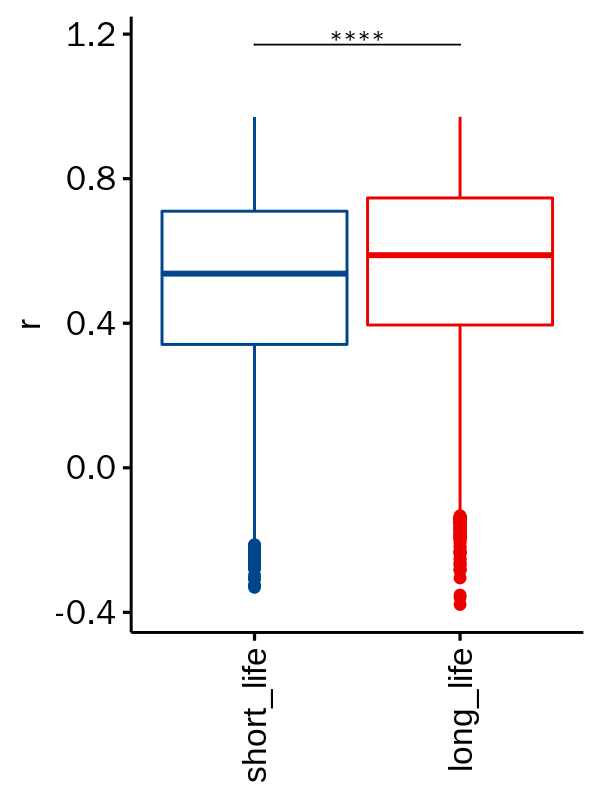

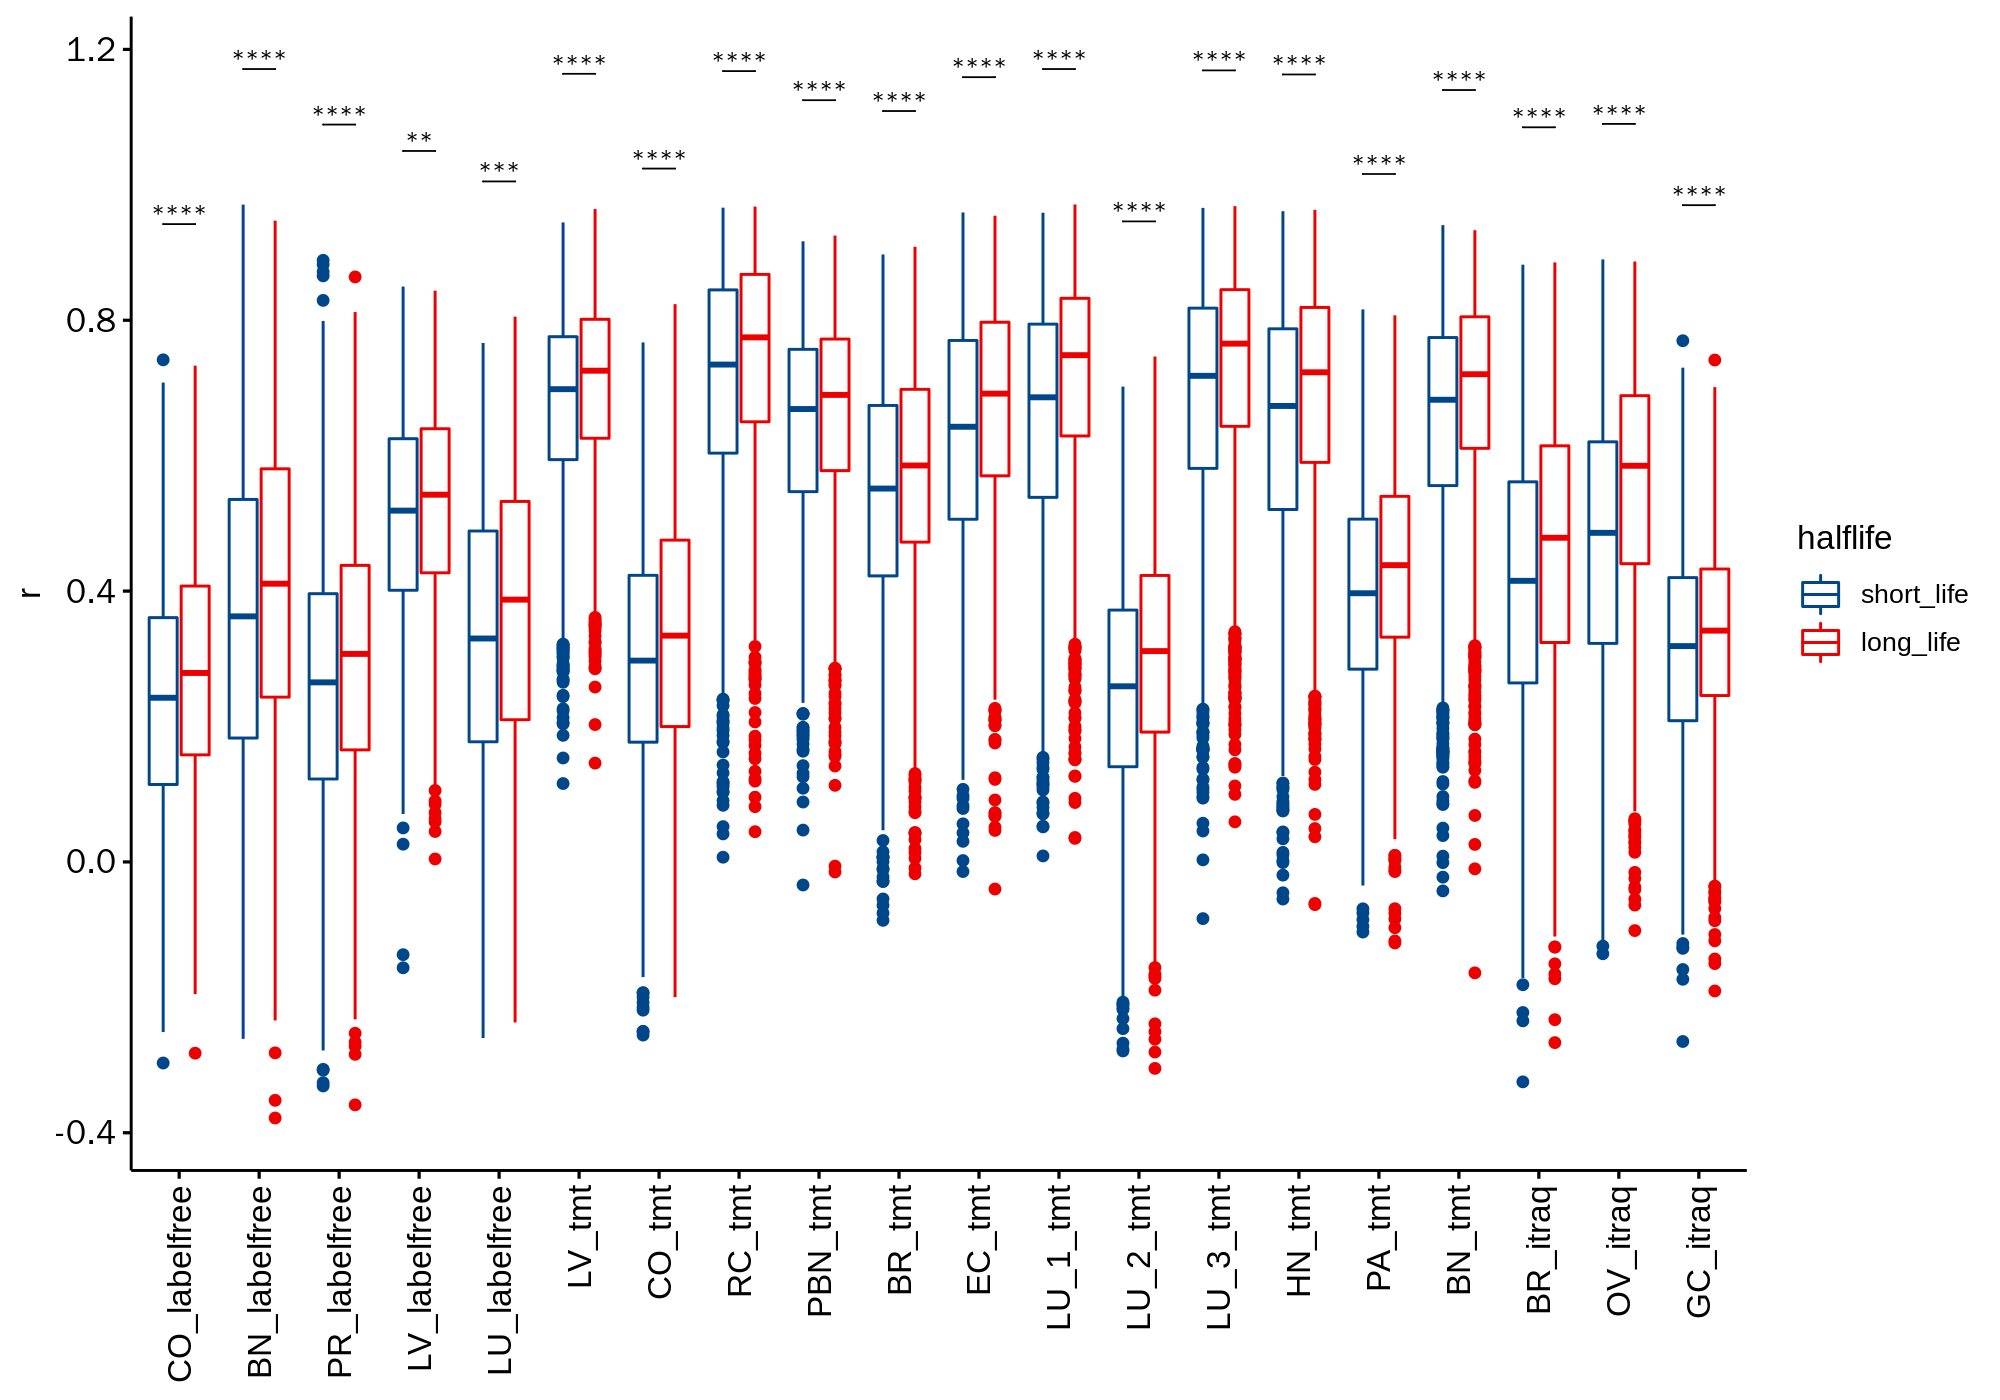

In [99]:
####
stat.test <- data %>% 
    wilcox_test(r ~ halflife) %>%
    adjust_pvalue(method = "BH") %>%
    add_significance("p.adj") %>% filter(p.adj.signif != "ns") %>%
    add_xy_position(x = "halflife", step.increase = 0) # dodge = 0.5, 

options(repr.plot.width = 3,  repr.plot.height = 4,  repr.plot.res = 200)
ggboxplot( data, x = "halflife", y = "r", color = "halflife", palette = "lancet", draw_quantiles = 0.5, # yscale = "log2",ylab ='log2(expression)',
        width = 0.9, title = NULL, ) +
    stat_pvalue_manual( stat.test, label = "p.adj.signif", tip.length =0, hide.ns = F, size =3, bracket.nudge.y = 0.2, 
                       step.increase = 0.05, vjust=0.5) +
    theme( axis.title.x=element_blank(), axis.text.x = element_text(angle=90, vjust=0.5, hjust=1), legend.position="none") 
ggsave("/media//eys/xwj/proteome/data/figs/fig8_halflife.svg", width = 3, height=7, units = 'cm')
######## 
stat.test <- data %>% 
    group_by(dataset) %>%
    wilcox_test(r ~ halflife) %>%
    adjust_pvalue(method = "BH") %>%
    add_significance("p.adj") %>% filter(p.adj.signif != "ns") %>%
    add_xy_position(x = "dataset", step.increase = 0) # dodge = 0.5, 

options(repr.plot.width = 10,  repr.plot.height = 7,  repr.plot.res = 200)
ggboxplot( data, x = "dataset", y = "r", color = "halflife", palette = "lancet", draw_quantiles = 0.5, # yscale = "log2",ylab ='log2(expression)',
        width = 0.7, title = NULL, ) +
    stat_pvalue_manual( stat.test, label = "p.adj.signif", tip.length =0, hide.ns = F, size =3, bracket.nudge.y = 0.2, 
                       step.increase = 0.05, vjust=0.5, step.group.by='dataset') +
    theme( axis.title.x=element_blank(), axis.text.x = element_text(angle=90, vjust=0.5, hjust=1), legend.position="right") 
ggsave("/media//eys/xwj/proteome/data/figs/fig8_halflife2.svg", width = 20, height=12, units = 'cm')

### protein peptide length

In [100]:
data = reload_data()
data <- data[data$'peptide_length' != '', ]  ## 
data$'peptide_length' <- factor(data$'peptide_length', levels = c('short_peptide', 'long_peptide'), ordered = TRUE)

[1] "reloading again"


Warning message:
“Ignoring unknown parameters: draw_quantiles”
Warning message:
“Ignoring unknown parameters: draw_quantiles”


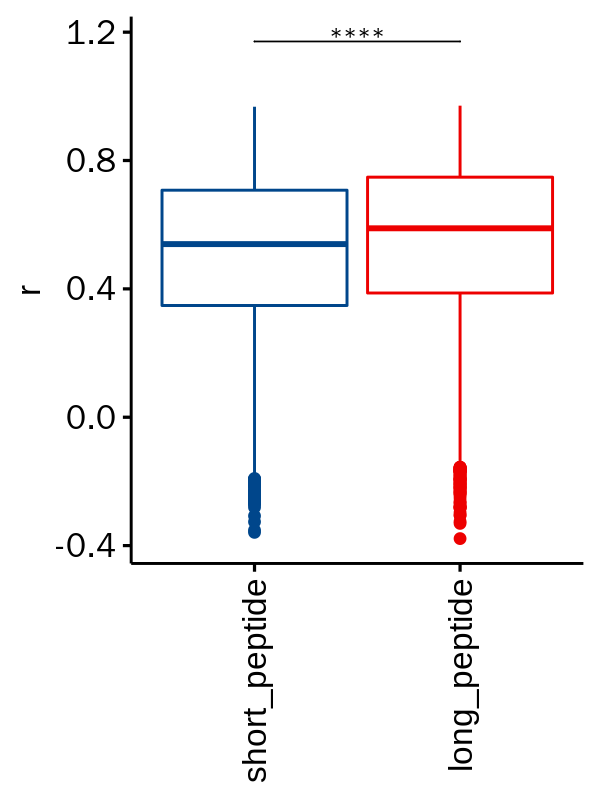

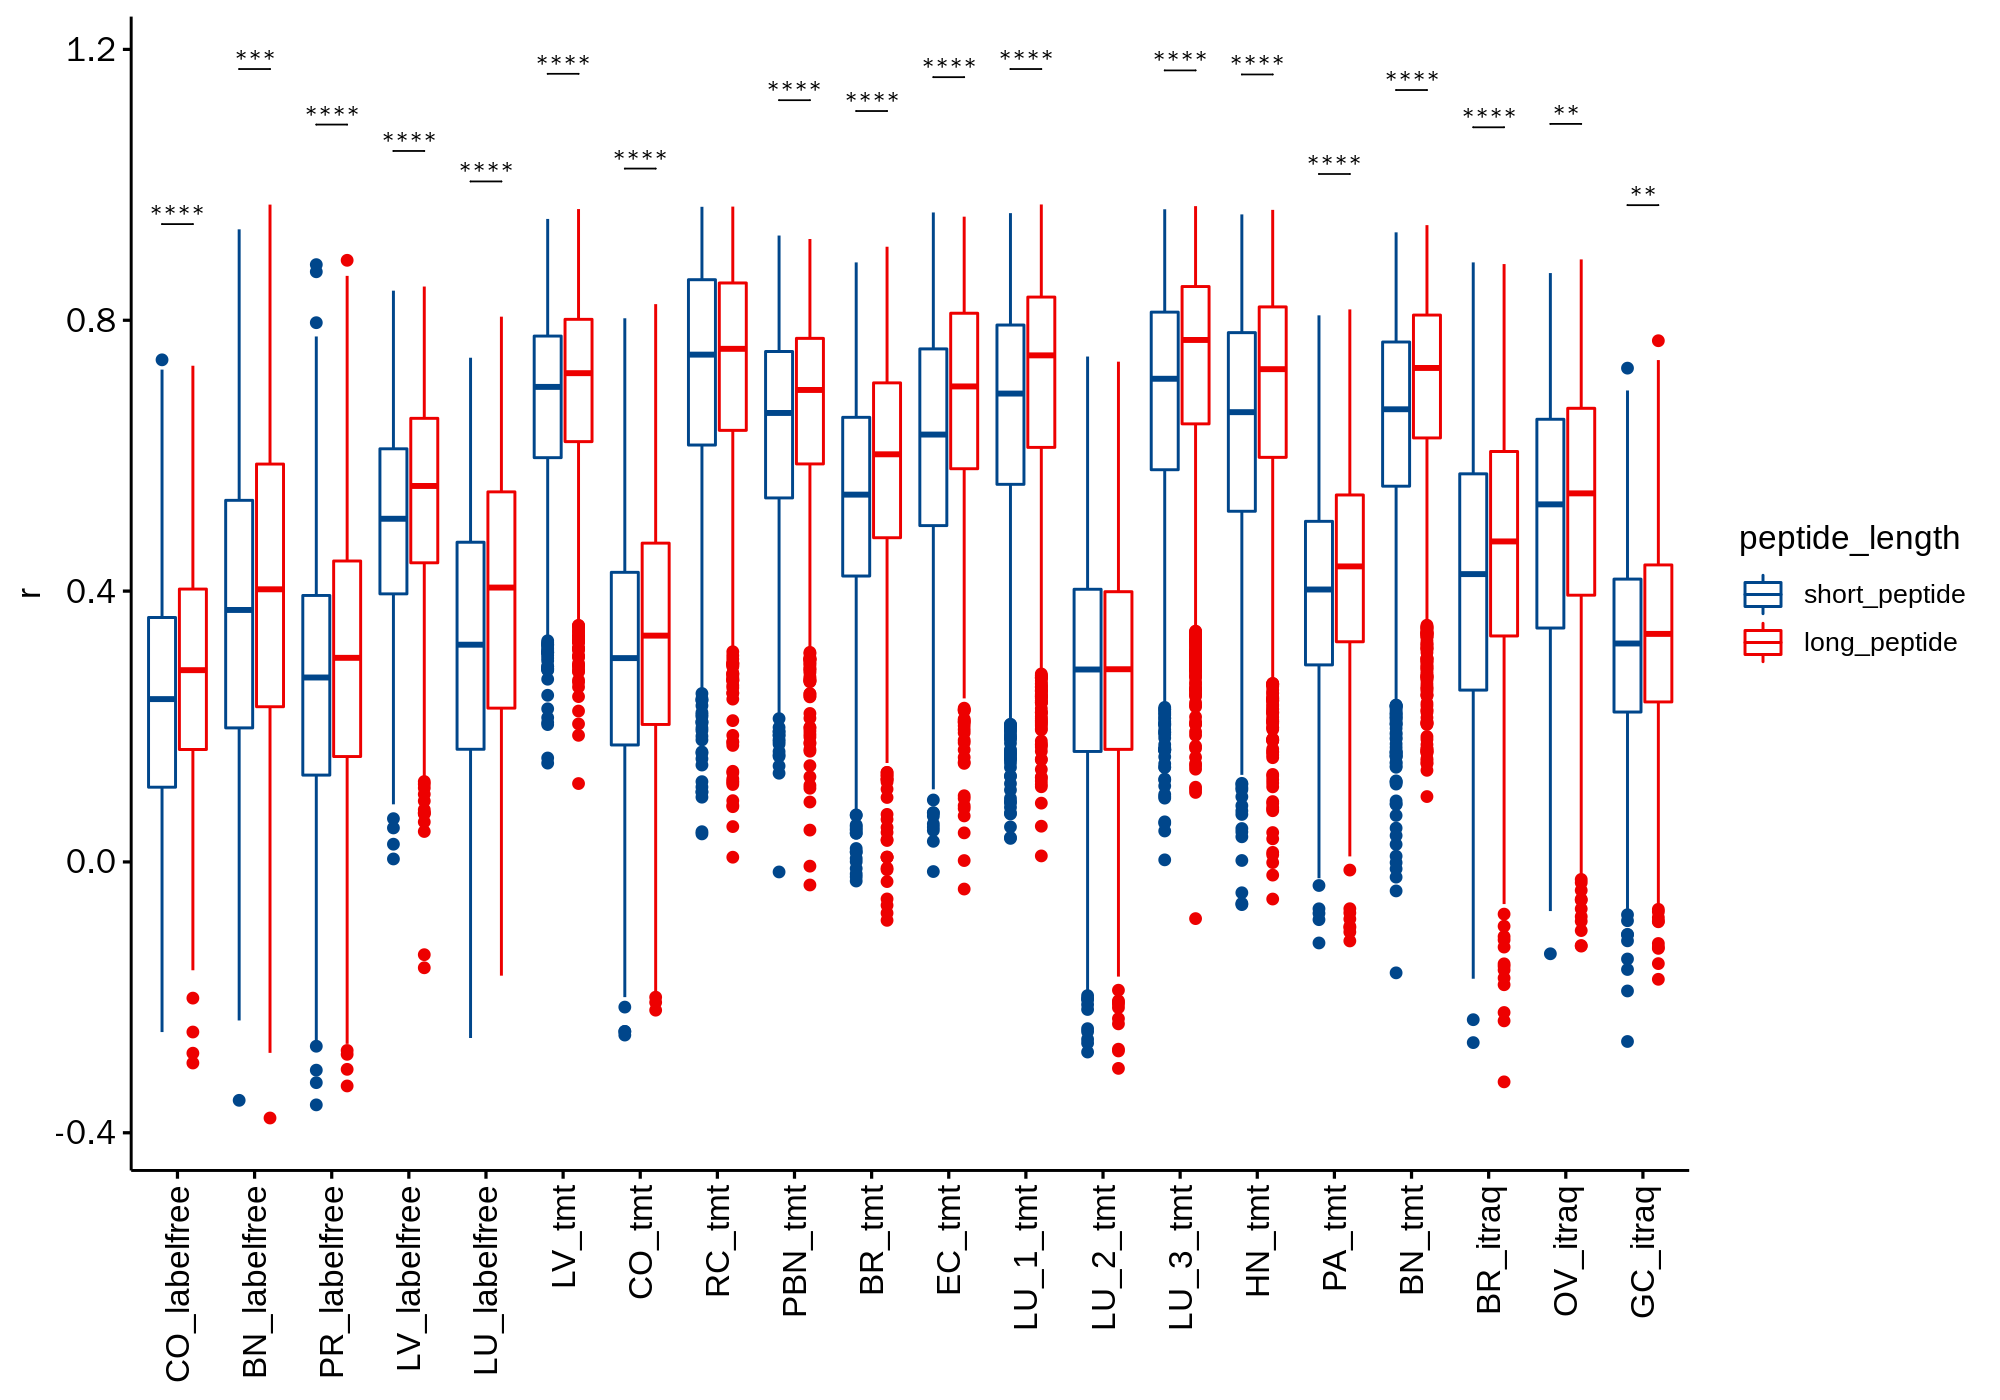

In [101]:
####
stat.test <- data %>% 
    wilcox_test(r ~ peptide_length) %>%
    adjust_pvalue(method = "BH") %>%
    add_significance("p.adj") %>% filter(p.adj.signif != "ns") %>%
    add_xy_position(x = "peptide_length", step.increase = 0) # dodge = 0.5, 

options(repr.plot.width = 3,  repr.plot.height = 4,  repr.plot.res = 200)
ggboxplot( data, x = "peptide_length", y = "r", color = "peptide_length", palette = "lancet", draw_quantiles = 0.5, # yscale = "log2",ylab ='log2(expression)',
        width = 0.9, title = NULL, ) +
    stat_pvalue_manual( stat.test, label = "p.adj.signif", tip.length =0, hide.ns = F, size =3, bracket.nudge.y = 0.2, 
                       step.increase = 0.05, vjust=0.5) +
    theme( axis.title.x=element_blank(), axis.text.x = element_text(angle=90, vjust=0.5, hjust=1), legend.position="none") 
ggsave("/media//eys/xwj/proteome/data/figs/fig8_peplength.svg", width = 3, height=7, units = 'cm')
######## 
stat.test <- data %>% 
    group_by(dataset) %>%
    wilcox_test(r ~ peptide_length) %>%
    adjust_pvalue(method = "BH") %>%
    add_significance("p.adj") %>% filter(p.adj.signif != "ns") %>%
    add_xy_position(x = "dataset", step.increase = 0) # dodge = 0.5, 

options(repr.plot.width = 10,  repr.plot.height = 7,  repr.plot.res = 200)
ggboxplot( data, x = "dataset", y = "r", color = "peptide_length", palette = "lancet", draw_quantiles = 0.5, # yscale = "log2",ylab ='log2(expression)',
        width = 0.7, title = NULL, ) +
    stat_pvalue_manual( stat.test, label = "p.adj.signif", tip.length =0, hide.ns = F, size =3, bracket.nudge.y = 0.2, 
                       step.increase = 0.05, vjust=0.5, step.group.by='dataset') +
    theme( axis.title.x=element_blank(), axis.text.x = element_text(angle=90, vjust=0.5, hjust=1), legend.position="right") 
ggsave("/media//eys/xwj/proteome/data/figs/fig8_peplength2.svg", width = 20, height=12, units = 'cm')

### protein abundance( labelfree ONLY)

In [102]:
data = reload_data()
data <- data[data$'abundance_labelfree' != '', ]  ## 
data$'abundance_labelfree' <- factor(data$'abundance_labelfree', levels = c( 'low_abundance','medium_abundance','high_abundance'), ordered = TRUE)

[1] "reloading again"


Warning message:
“Ignoring unknown parameters: draw_quantiles”
Warning message:
“Ignoring unknown parameters: draw_quantiles”


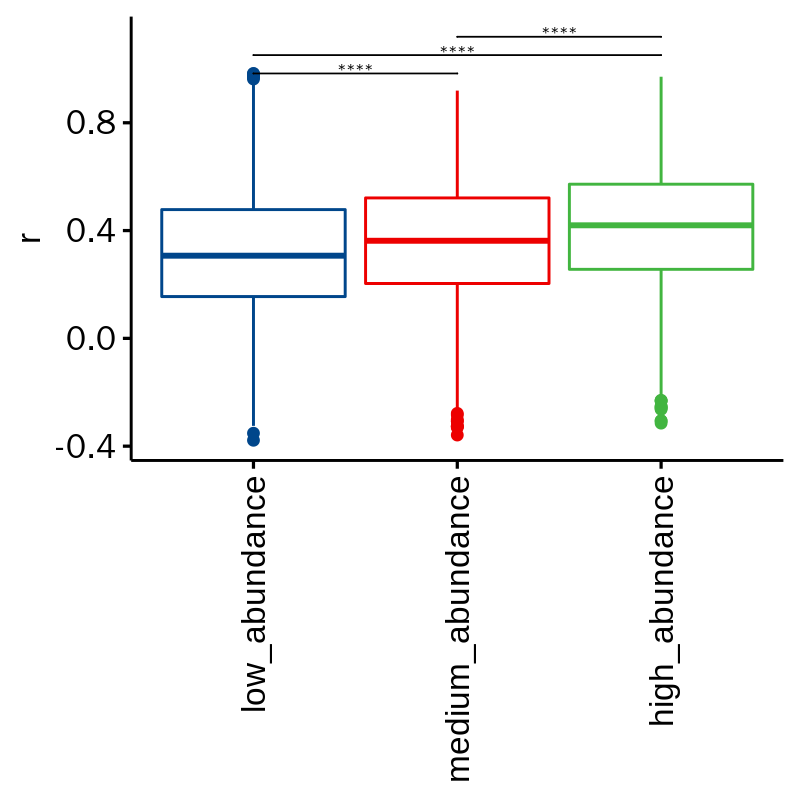

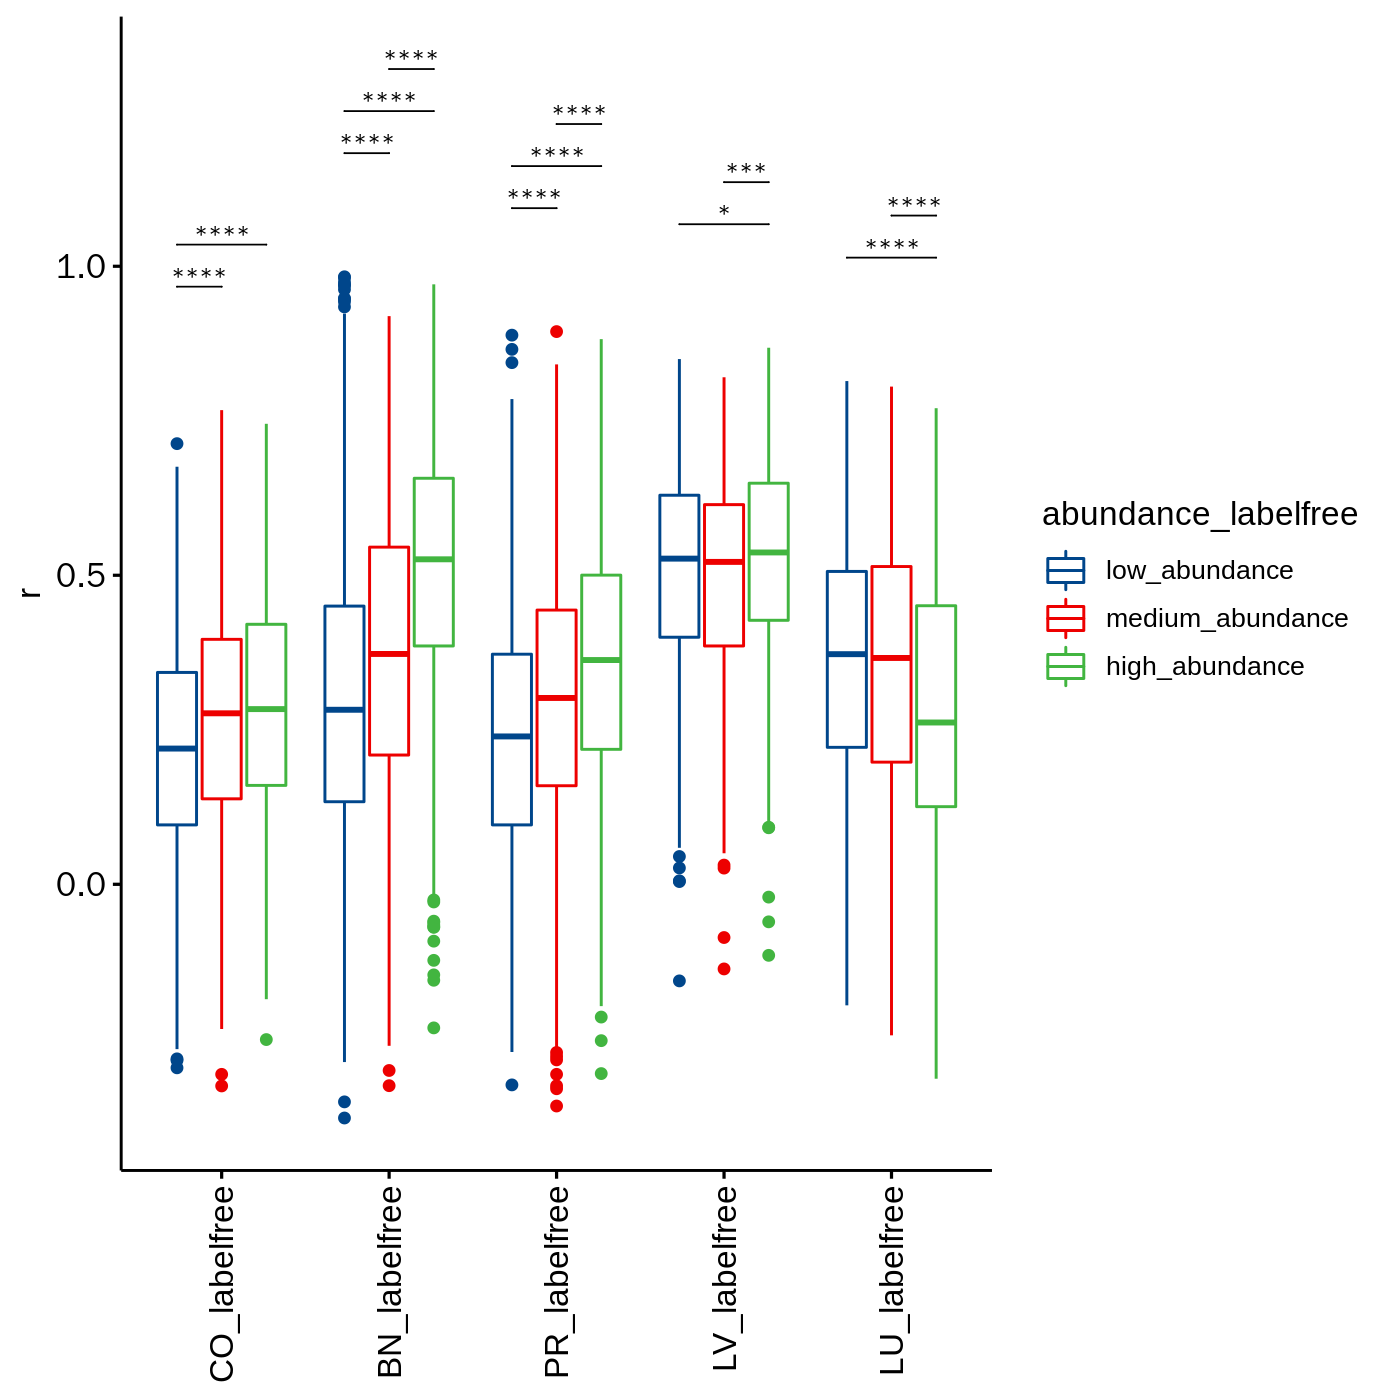

In [103]:
####
stat.test <- data %>% 
    wilcox_test(r ~ abundance_labelfree) %>%
    adjust_pvalue(method = "BH") %>%
    add_significance("p.adj") %>% filter(p.adj.signif != "ns") %>%
    add_xy_position(x = "abundance_labelfree", step.increase = 0) # dodge = 0.5, 

options(repr.plot.width = 4,  repr.plot.height = 4,  repr.plot.res = 200)
ggboxplot( data, x = "abundance_labelfree", y = "r", color = "abundance_labelfree", palette = "lancet", draw_quantiles = 0.5, # yscale = "log2",ylab ='log2(expression)',
        width = 0.9, title = NULL, ) +
    stat_pvalue_manual( stat.test, label = "p.adj.signif", tip.length =0, hide.ns = F, size =2, bracket.nudge.y = 0., 
                       step.increase = 0.05, vjust=0.5) +
    theme( axis.title.x=element_blank(), axis.text.x = element_text(angle=90, vjust=0.5, hjust=1), legend.position="none") 
ggsave("/media//eys/xwj/proteome/data/figs/fig8_abundance.svg", width = 4, height=8, units = 'cm')
######## 
stat.test <- data %>% 
    group_by(dataset) %>%
    wilcox_test(r ~ abundance_labelfree) %>%
    adjust_pvalue(method = "BH") %>%
    add_significance("p.adj") %>% filter(p.adj.signif != "ns") %>%
    add_xy_position(x = "dataset", step.increase = 0) # dodge = 0.5, 

options(repr.plot.width = 7,  repr.plot.height = 7,  repr.plot.res = 200)
ggboxplot( data, x = "dataset", y = "r", color = "abundance_labelfree", palette = "lancet", draw_quantiles = 0.5, # yscale = "log2",ylab ='log2(expression)',
        width = 0.7, title = NULL, ) +
    stat_pvalue_manual( stat.test, label = "p.adj.signif", tip.length =0, hide.ns = F, size =3, bracket.nudge.y = 0.2, 
                       step.increase = 0.05, vjust=0.5, step.group.by='dataset') +
    theme( axis.title.x=element_blank(), axis.text.x = element_text(angle=90, vjust=0.5, hjust=1), legend.position="right") 
ggsave("/media//eys/xwj/proteome/data/figs/fig8_abundance2.svg", width = 15, height=12, units = 'cm')